<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width="250">
</p>

# <h1 align="center">Projeto ChurnInsight – Spotify Dataset</h1>


# <font color=#1DB954>🌟 1 - Hackathon ONE II  

**Equipe:** H12-25-B-Equipo 14 ( **DataBeats** )


## <font color=#1DB954>1.1 - Resumo Executivo

Este projeto aborda o problema de **churn de clientes em plataformas digitais**, inspirado no comportamento de usuários do Spotify, no qual a perda recorrente de usuários impacta diretamente a receita e o crescimento do negócio.

Foi desenvolvido um **modelo preditivo de Machine Learning** capaz de estimar a probabilidade de cancelamento de cada usuário com base em dados demográficos, comportamentais e de uso da plataforma.

A solução prioriza a métrica **Recall**, visando minimizar falsos negativos — ou seja, reduzir o número de clientes que cancelam sem serem identificados previamente.

O resultado é uma **solução end-to-end**, que contempla:
- Pipeline completo de dados e modelagem,
- Avaliação com métricas alinhadas ao negócio,
- Explicabilidade do modelo (SHAP),
- Exportação para integração via API REST.

A aplicação prática do modelo permite ações proativas de retenção, maior eficiência operacional e suporte direto à tomada de decisão estratégica.
#
---
#
## 🎯 Objetivo

Desenvolver um **modelo preditivo de classificação binária** capaz de identificar usuários com alto risco de churn, apoiando decisões estratégicas de retenção e priorização de ações de marketing.

O notebook cobre todas as etapas essenciais para entrega de um MVP funcional:
- Exploração e análise dos dados (EDA)
- Preparação e engenharia de features
- Treinamento e avaliação de modelos
- Seleção orientada por métricas de negócio
- Exportação para uso em produção
#
---
#
## 🎯 Sobre o Dataset — *Spotify Churn Analysis 2025*
#
O dataset contém informações sobre:

- **Dados demográficos:** idade, gênero, país  
- **Informações de assinatura:** tipo de plano (Gratuito, Premium, Familiar, Estudante)  
- **Hábitos de uso:** tempo diário de escuta, músicas por dia, taxa de pulos  
- **Interações com anúncios:** número de anúncios por semana  
- **Uso offline e tipo de dispositivo**  
- **Variável alvo:** `is_churned` → (0 = manteve, 1 = cancelou)

Esses atributos são utilizados para construir modelos que aprendem padrões associados ao churn.
#
---
#
## 🎯 Tecnologias Utilizadas

- **Python 3**  
- **Pandas, NumPy, Seaborn, Matplotlib**  
- **Scikit-learn** (modelagem)  
- **Joblib** e **onnxruntime** (exportação do modelo)  
#
---
#
## 🎯 Resultado Esperado

Ao final do projeto, espera-se entregar:

- Um modelo treinado, validado e interpretável
- Métricas claras e alinhadas ao impacto de negócio
- Artefatos exportados para uso em produção (`.pkl, .onnx, metadata`)
- Contrato de integração definido para consumo via **API REST**
#
**Vamos começar!** 👇

## <font color=#1DB954>1.2 - Importação do Banco de Dados


Nesta etapa, realizamos a importação do **dataset** que será utilizado ao longo de todo o projeto. Garantir que os dados sejam carregados corretamente é fundamental para assegurar a consistência das análises subsequentes e a confiabilidade dos resultados obtidos.


In [1]:
# Criado por Mariana.. 10/12/2025
# Edição por Andre.... 11/12/2025
# Edição por Mariana.. 12/12/2025
# Edição por Luiz..... 15/12/2025
# Edição por Kelly.... 15/12/2025 (Adição imports)
# Edição por Kelly.... 21/12/2025 (Correção Sintaxe)
# Edição por Mariana.. 25/12/2025 (Adição de módulos)
# Edição por André.... 30/12/2025 (Intalou panel e jupyter)

# Instalar/Importar bibliotecas
!pip install --upgrade pip -q
!python -m pip install --upgrade pip
!python -m pip install onnxruntime > /dev/null
!pip install -q skl2onnx onnxruntime
!pip install phik -q
!python -m pip install seaborn matplotlib > /dev/null
!python -m pip install scikit-learn > /dev/null
!python -m pip install imbalanced-learn > /dev/null
!pip install -q panel hvplot
!pip install jupyter_bokeh > /dev/null

import os, traceback, json
import numpy as np
import pandas as pd
import joblib
import onnxruntime as rt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import phik

from sklearn.base import clone
from IPython.display import display
from phik.report import plot_correlation_matrix
from matplotlib.collections import PatchCollection, LineCollection
from matplotlib.colors import LinearSegmentedColormap
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.exceptions import UndefinedMetricWarning
from scipy.stats import chi2_contingency, randint
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score,
    precision_recall_curve,
    auc,
    RocCurveDisplay)


# Configurações de visualização
sns.set(style="whitegrid", palette="muted")

# Caminho raw do CSV no GitHub
RAW_URL = "https://raw.githubusercontent.com/aluizr/Hackathon-ONE---Churn-clientes/main/spotify_churn_dataset.csv"

# Leitura do dataset
df = pd.read_csv(RAW_URL)

print(f"📊 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas\n")
display(df.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
📊 Dimensões: 8000 linhas × 12 colunas



,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1



A base de dados apresenta uma estrutura consistente, com **8.000 registros** e **12 variáveis**, contemplando informações demográficas, comportamentais e a variável alvo relacionada ao **churn**. Esse conjunto oferece uma visão abrangente do comportamento dos usuários, sendo adequado para as próximas etapas de exploração, tratamento e modelagem preditiva.


## <font color=#1DB954> 1.3 - Limitação Temporal

O dataset não contém informações de data ou sequências temporais por cliente. Portanto, não será possível realizar:

- Análise de churn ao longo do tempo
- Modelagem de sobrevivência
- Séries temporais ou validação temporal

O problema será tratado como **classificação estática por snapshot**, o que é adequado ao contexto e à natureza dos dados fornecidos.


## <font color=#1DB954>1.4 - Dicionário de Dados e Hipóteses de Negócio

A fase de entendimento dos dados é o alicerce de qualquer projeto de Machine Learning.

Para o **ChurnInsight**, realizamos o mapeamento de variáveis comportamentais e demográficas que capturam a jornada do usuário dentro do ecossistema Spotify. O objetivo deste dicionário é fornecer transparência sobre o que o modelo está "observando" e quais são as nossas premissas de negócio para cada atributo técnico.

Definimos abaixo as variáveis extraídas do dataset:
#
## <font color=black>
| Variável |       Descrição       | Hipótese de Negócio |
|----------|-----------------------|---------------------|
| `age` | Idade do usuário | Diferentes gerações possuem sensibilidade distinta a preços e novos formatos de conteúdo. |
| `listening_time` | Tempo diário de escuta (min) | O engajamento é inversamente proporcional ao churn: quanto mais tempo logado, menor o risco. |
| `songs_played_per_day` | Músicas tocadas por dia | Indica a intensidade de uso. Um volume muito baixo pode sinalizar desinteresse precoce. |
| `skip_rate` | Taxa de pulo de faixas (Skips) | Indicador de qualidade: uma taxa alta sugere que as recomendações não estão sendo assertivas. |
| `ads_listened_per_week` | Anúncios ouvidos por semana | O excesso de interrupções em contas Free pode ser um gatilho de insatisfação e saída. |
| `offline_listening` | Uso de modo offline (0/1) | Usuários que utilizam downloads demonstram maior integração e uso planejado do app. |
| `subscription_type` | Tipo de plano (Free, Premium...) | Planos pagos tendem a apresentar maior fidelidade e LTV do que o plano gratuito. |
| `country` | País de origem do usuário | Fatores culturais, econômicos e concorrência regional influenciam a retenção. |
| `device_type` | Dispositivo principal de acesso | A experiência de interface (Mobile vs Desktop) pode impactar a retenção a longo prazo. |
| `is_churned` | Variável alvo (target) | Binária (0 ou 1): indica se o cliente cancelou ou permaneceu. |



 ### <font color=#1DB954>1.4.1 - Variável Tradutor

In [2]:
# Criado por Mariana 26/12/2025 ( Para usar nos gráficos )
# Edição por Mariana 14/01/2026 ( Acresentando novas colunas )


tradutor = {
    # Colunas Originais
    'user_id': 'ID do Usuário',
    'gender': 'Gênero',
    'age': 'Idade',
    'country': 'País',
    'subscription_type': 'Tipo de Assinatura',
    'listening_time': 'Tempo de Escuta (min)',
    'songs_played_per_day': 'Músicas por Dia',
    'skip_rate': 'Taxa de Pulagem',
    'device_type': 'Tipo de Dispositivo',
    'ads_listened_per_week': 'Anúncios por Semana',
    'offline_listening': 'Uso Offline',
    'is_churned': 'Cancelamento (Churn)',

    # Novas Colunas (Feature Engineering)
    'songs_per_minute': 'Músicas por Minuto',
    'ad_intensity': 'Intensidade de Anúncios',
    'frustration_index': 'Índice de Frustração',
    'is_heavy_user': 'Usuário Intenso (Heavy)',
    'premium_no_offline': 'Premium sem Offline'
}

## <font color=#1DB954>1.5 - Métrica de Sucesso

O sucesso do projeto é avaliado sob duas perspectivas:

- **Métrica de negócio:** Maximizar a retenção de clientes, priorizando a identificação de usuários com maior risco de churn para permitir ações preventivas.
- **Métrica técnica:** Maximizar o **Recall da classe churn**, minimizando falsos negativos (clientes que cancelariam, mas não foram identificados pelo modelo), mesmo que isso implique em aumento controlado de falsos positivos.

Essa escolha reflete o custo assimétrico do problema: perder um cliente é mais oneroso do que contatar preventivamente um cliente que não cancelaria.

#<font color=#1DB954>📌 2 -  Análise Exploratória dos Dados (EDA)

A **Análise Exploratória dos Dados (EDA)** tem como objetivo compreender a estrutura, a distribuição e o comportamento das variáveis presentes no conjunto de dados. Nesta etapa, buscamos identificar padrões, possíveis inconsistências, relações iniciais entre as variáveis e indícios que possam influenciar o cancelamento dos usuários.

A **EDA** é uma fase essencial do pipeline de ciência de dados, pois orienta decisões importantes nas etapas seguintes, como o tratamento dos dados, a engenharia de features e a escolha dos modelos preditivos mais adequados.


In [3]:
# Criado por Andre.... 11/12/2025
# Edição por Mariana.. 12/12/2025 (Edição do print)

print("\n====================== INFO: =======================")
print(df.info())

# Conversões de tipo
cat_cols = ['gender','country','subscription_type','device_type']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Alvo binário
df['is_churned'] = df['is_churned'].astype(int)

print("\n\n===== CATEGORIAS E CARDINALIDADE: =====")
for col in cat_cols:
    print(f"- {col:<18}{df[col].nunique():>4} valores únicos")

# Valores nulos
print("\n\n===== VALORES NULOS: ======")
print(df.isna().sum())

# Balanceamento da variável alvo
print("\n\n== DISTRIBUIÇÃO ALVO: ==")
df['is_churned'].value_counts(normalize=True)



====================== INFO: =======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB
None


===== CATEGORIAS E CARDINALIDADE: =====


,proportion
is_churned,
0,0.741125
1,0.258875


A análise inicial dos dados indica que o conjunto apresenta uma estrutura consistente, sem valores nulos e com tipos de dados bem definidos, o que reduz a necessidade de tratamentos corretivos complexos e permite focar na engenharia de atributos.

A variável alvo apresenta um desbalanceamento de aproximadamente **25,8%**, cenário comum em problemas reais de retenção (churn).

Esta característica será rigorosamente considerada nas próximas etapas, especialmente na escolha das métricas de avaliação — onde priorizaremos o **Recall** para minimizar a perda de clientes não identificados — e na aplicação de técnicas de balanceamento como o **SMOTE** durante o treinamento dos algoritmos.

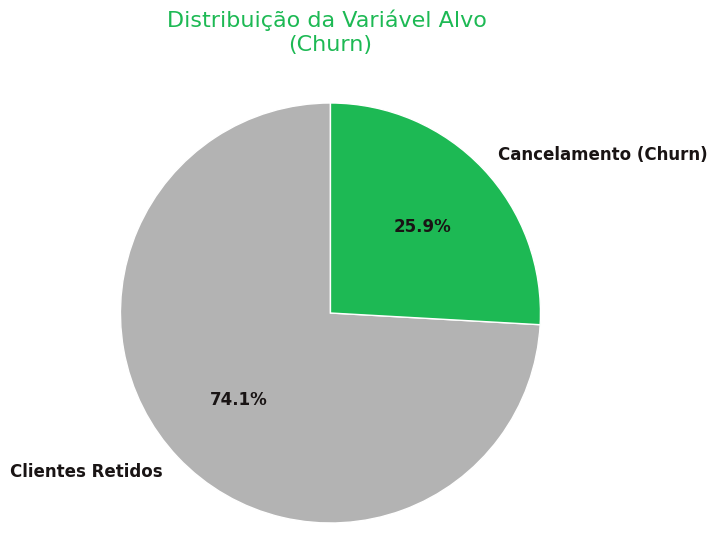

In [4]:
# Criado por Kelly.... 15/12/2025
# Edição por Mariana.. 22/12/2025 (Palette spotify)
# Edição por Mariana.. 24/12/2025 (Grafico de barra para pizza)

contagem = df['is_churned'].value_counts()

nome_alvo = tradutor.get('is_churned', 'is_churned')

labels = ['Clientes Retidos', f'{nome_alvo}']
cores = ["#B3B3B3", "#1DB954"]

plt.figure(figsize=(8, 6))
plt.pie(
    contagem,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'color':"#191414", 'fontsize':12, 'weight':'bold'}
)

plt.title('Distribuição da Variável Alvo \n(Churn)\n', fontsize=16, color="#1DB954")
plt.axis('equal')
plt.show()

##<font color=#1DB954> 2.1 - Análise das Variáveis


###<font color=#1DB954> 2.1.1 - Teste Qui-quadrado

Nesta etapa, aplicamos o **Teste Qui-quadrado de independência** para avaliar a existência de associação estatística entre as variáveis categóricas e a variável alvo **churn**.

O objetivo é verificar se, de forma **isolada**, cada variável categórica apresenta dependência em relação ao cancelamento do serviço, auxiliando na compreensão do comportamento dos clientes e apoiando decisões de **seleção e interpretação de features** antes do treinamento dos modelos de Machine Learning.

In [5]:
# Criado por Luiz..... 11/12/2025
# Edição por Mariana.. 25/12/2025 (Edição do print)

print("\n=============== TESTE QUI-QUADRADO ===============\n")
print(f"{'Variável':<20} | {'p-valor':<10} | {'Status'}")
print("-" * 50)

for feature in ['gender', 'country', 'subscription_type', 'device_type']:
    cont = pd.crosstab(df[feature], df["is_churned"])
    chi2, p, dof, exp = chi2_contingency(cont)
    status = "Relevante" if p < 0.05 else "Insignificante"
    print(f"{feature:<20} | {p:<10.4f} | {status}")




=============== TESTE QUI-QUADRADO ===============

Variável             | p-valor    | Status
--------------------------------------------------
gender               | 0.6005     | Insignificante
country              | 0.5449     | Insignificante
subscription_type    | 0.2161     | Insignificante
device_type          | 0.3055     | Insignificante


A análise realizada permitiu avaliar o comportamento das variáveis categóricas em relação ao churn, contribuindo para uma compreensão mais clara de seu impacto individual no cancelamento do serviço. Embora os testes estatísticos não tenham indicado associação significativa de forma isolada, os resultados reforçam a importância de manter essas variáveis no conjunto de dados, considerando possíveis interações e padrões capturados pelos modelos de Machine Learning. Dessa forma, esta etapa apoia decisões mais conscientes no pré-processamento e fortalece a construção de um modelo mais robusto e alinhado ao problema de negócio.

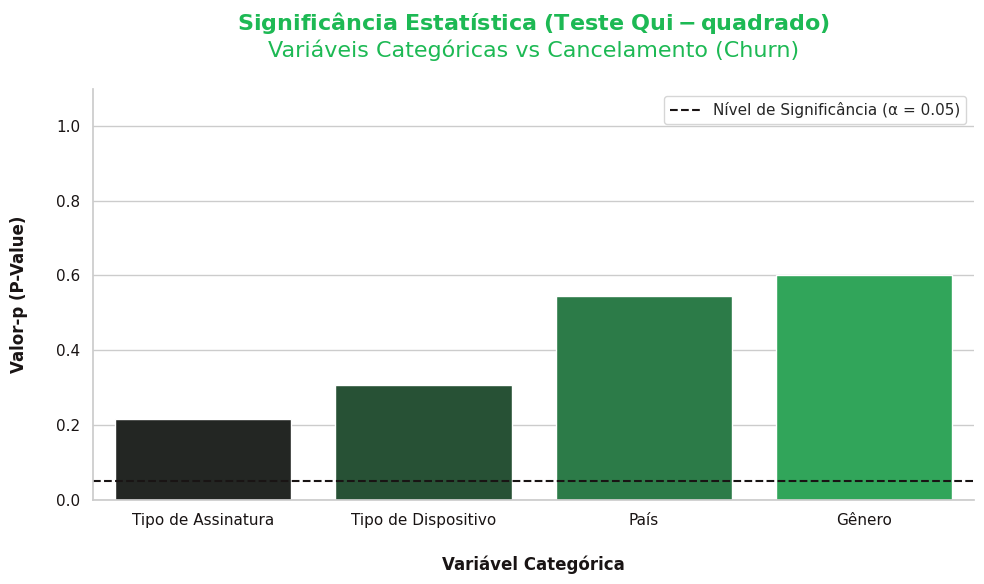

In [6]:
# Criado por Luiz..... 11/12/2025
# Edição por Mariana.. 23/12/2025 (Padronizar palette e tradução features)

# Plotagem Teste Chi
var_categoricas = ['gender', 'country', 'subscription_type', 'device_type']

chi2_results = []
for feature in var_categoricas:
    contingency_table = pd.crosstab(df[feature], df['is_churned'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    nome_pt = tradutor.get(feature, feature)
    chi2_results.append({'Variável': nome_pt, 'P_Value': p_value})

chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values(by='P_Value', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Variável',
    y='P_Value',
    data=chi2_df,
    hue='Variável',
    palette='dark:#1DB954'
)

plt.axhline(y=0.05, color='#191414', linestyle='--', label='Nível de Significância (α = 0.05)')

nome_alvo = tradutor.get('is_churned', 'Churn')

plt.title(
    r'$\mathbf{Significância\ Estatística\ (Teste\ Qui-quadrado)}$' +
    f'\nVariáveis Categóricas vs {nome_alvo}\n',
    fontsize=16, color="#1DB954"
)

plt.xlabel('Variável Categórica', color="#191414", fontsize=12, labelpad=20, fontweight='bold')
plt.ylabel('Valor-p (P-Value)', color="#191414", fontsize=12, labelpad=20, fontweight='bold')

plt.xticks(rotation=0, ha='center', color="#191414")
plt.yticks(color="#191414")
plt.ylim(0, 1.1)

plt.legend(frameon=True, facecolor='white', loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()

###<font color=#1DB954> 2.1.2 - Correlação de Pearson

Nesta etapa, utilizamos o **Coeficiente de Correlação de Pearson** para avaliar a relação linear entre as variáveis numéricas e a variável alvo churn. O objetivo é identificar quais atributos apresentam maior correlação com o cancelamento do serviço, apoiando a compreensão do comportamento dos usuários e contribuindo para decisões mais informadas na seleção e priorização de features ao longo do desenvolvimento do modelo.

In [7]:
# Criado por Luiz..... 11/12/2025
# Edição por Mariana.. 12/12/2025 (Edição do print)

print("\n================= CORRELAÇÃO DE PEARSON =================\n")
print(f"{'Variável':<25} | {'Correlação':<12} | {'Impacto'}")
print("-" * 57)

num_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']

for col in num_cols:
    corr = df[col].corr(df["is_churned"])
    if abs(corr) > 0.5:
        status = "Relevante"
    elif abs(corr) > 0.1:
        status = "Moderado/Fraco"
    else:
        status = "Insignificante"

    print(f"{col:<25} | {corr:<12.3f} | {status}")




================= CORRELAÇÃO DE PEARSON =================

Variável                  | Correlação   | Impacto
---------------------------------------------------------
age                       | 0.004        | Insignificante
listening_time            | -0.008       | Insignificante
songs_played_per_day      | 0.009        | Insignificante
skip_rate                 | 0.016        | Insignificante
ads_listened_per_week     | -0.002       | Insignificante
offline_listening         | 0.013        | Insignificante


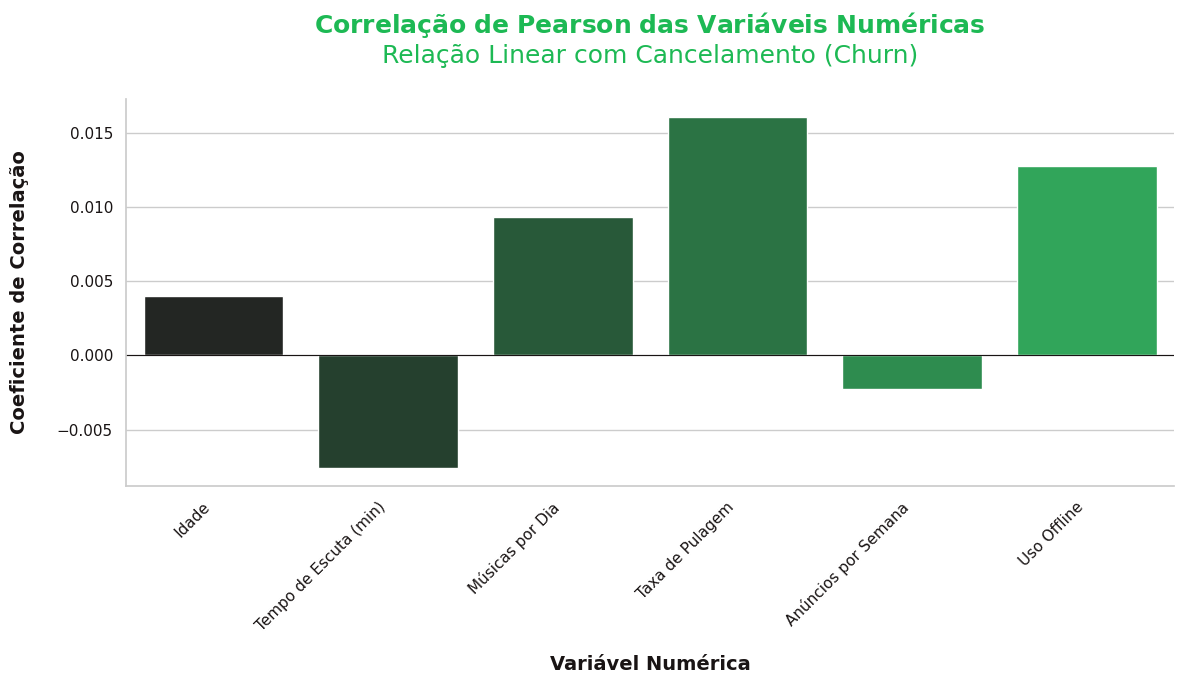

In [8]:
# Criado por Luíz..... 11/12/2025
# Criado por Luíz..... 11/12/2025
# Edição por Mariana.. 23/12/2025 (Padronizar palette)

# Plotagem Coeficiente Pearson
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['user_id', 'is_churned']]

pearson_correlations = df[numerical_cols + ['is_churned']].corr(method='pearson')['is_churned'].drop('is_churned')

nomes_traduzidos = [tradutor.get(col, col) for col in pearson_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(12, 7))
sns.barplot(
    x=nomes_traduzidos,
    y=pearson_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)

plt.title(
    r'$\mathbf{Correlação\ de\ Pearson\ das\ Variáveis\ Numéricas}$' +
    f'\nRelação Linear com {nome_alvo}\n',
    fontsize=18, color="#1DB954"
)

plt.xlabel('Variável Numérica', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Coeficiente de Correlação', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()

Os resultados da correlação de Pearson indicaram ausência de relação linear significativa entre as variáveis numéricas analisadas e o churn quando consideradas individualmente. Esse comportamento sugere que o cancelamento do serviço não é explicado por efeitos lineares simples, reforçando a necessidade de utilizar modelos capazes de capturar **interações e padrões mais complexos**. Dessa forma, as variáveis numéricas foram mantidas no conjunto de dados, considerando seu potencial contributivo em conjunto com outras features ao longo do processo de modelagem.

###<font color=#1DB954> 2.1.3 - Coeficiente de Correlação $\phi k$ (Phi-K)

Para uma análise de dependência mais profunda, utilizamos o coeficiente $\phi k$. Diferente das métricas tradicionais, o $\phi k$ é uma evolução baseada no refinamento do teste Qui-Quadrado de Pearson, apresentando vantagens cruciais para este dataset:

- **Versatilidade de Dados**: Ele calcula a correlação entre qualquer combinação de tipos de variáveis (Categórica vs Categórica, Categórica vs Contínua e Contínua vs Contínua).

 - **Captura de Relações Não-Lineares**: Enquanto Pearson mede apenas relações em linha reta, o $\phi k$ identifica padrões complexos e dependências ocultas que modelos de Machine Learning (como Random Forest e XGBoost) costumam explorar.

  - **Consistência**: A métrica é refinada para evitar superestimação em variáveis com muitas categorias, oferecendo uma visão mais realista do que realmente impacta o **Churn**.

In [9]:
# Criado por Mariana.. 14/01/2026

print("\n================== CORRELAÇÃO PHIK (ϕk) =================\n")
print(f"{'Variável':<25} | {'Correlação':<12} | {'Impacto'}")
print("-" * 57)

num_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']

phik_matrix = df[num_cols + ['is_churned']].phik_matrix(interval_cols=num_cols)
correlations = phik_matrix['is_churned'].drop('is_churned')

for col, corr in correlations.items():
    if corr > 0.5:
        status = "Relevante"
    elif corr > 0.1:
        status = "Moderado/Fraco"
    else:
        status = "Insignificante"

    print(f"{col:<25} | {corr:<12.3f} | {status}")


================== CORRELAÇÃO PHIK (ϕk) =================

Variável                  | Correlação   | Impacto
---------------------------------------------------------
age                       | 0.000        | Insignificante
listening_time            | 0.008        | Insignificante
songs_played_per_day      | 0.033        | Insignificante
skip_rate                 | 0.000        | Insignificante
ads_listened_per_week     | 0.000        | Insignificante
offline_listening         | 0.009        | Insignificante


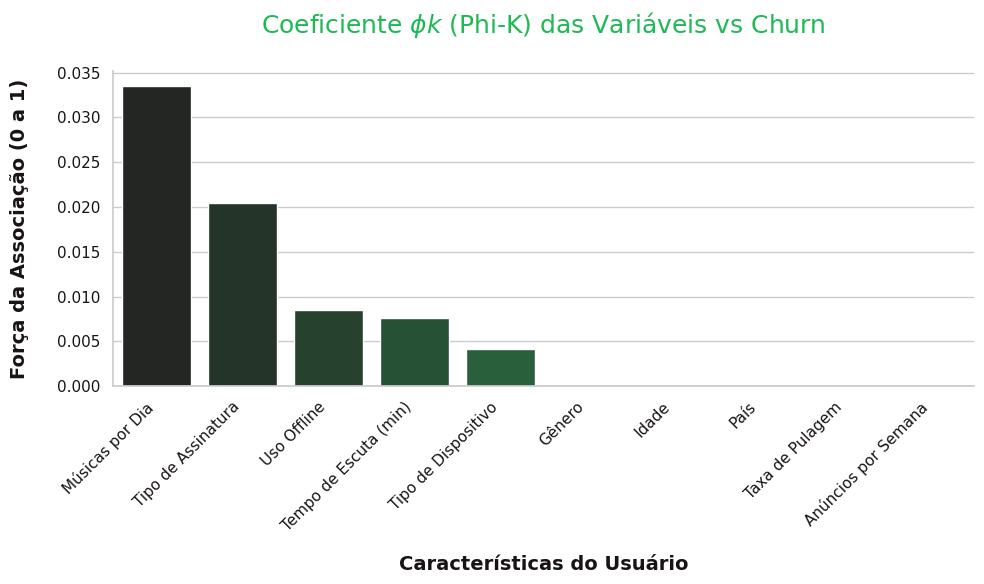

In [10]:
# Criado por Mariana.. 25/12/2025

interval_columns = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

ph_corr = df.drop(columns=['user_id']).phik_matrix(interval_cols=interval_columns)

phik_correlations = ph_corr['is_churned'].drop('is_churned').sort_values(ascending=False)
nomes_traduzidos = [tradutor.get(col, col) for col in phik_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=nomes_traduzidos,
    y=phik_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)
plt.title(r'Coeficiente $\phi k$ (Phi-K) das Variáveis vs Churn' + '\n', fontsize=18, color="#1DB954")
plt.xlabel('Características do Usuário', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Força da Associação (0 a 1)', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()

Diferente das correlações lineares tradicionais, o coeficiente $\phi_k$ revelou que a variável **Músicas por Dia** (`songs_played_per_day`) possui a maior associação com o cancelamento. Isso indica que o comportamento de consumo diário é o indicador mais sensível para prever a saída de um usuário.

Logo em seguida, o ranking destaca fatores críticos como  **Tipo de Assinatura** (`subscription_type`), evidenciando que a fricção causada pela publicidade e o modelo de plano escolhido são determinantes para a evasão. Outras variáveis como **Uso Offline** (`offline_listening`), **Tempo de Escuta** (`listening_time`) e **Tipo de Dispositivo** (`device_type`) também apresentam dependências não-lineares que seriam subestimadas por métodos convencionais.

###<font color=#1DB954> 2.1.4 - Feature Engineering para Churn

A análise exploratória revelou que os dados brutos possuem baixo sinal estatístico para o Churn. Para superar essa limitação, aplicaremos **Feature Engineering**. O objetivo é transformar variáveis isoladas em indicadores de comportamento e negócio, permitindo que o modelo identifique padrões complexos de insatisfação e engajamento que não estão explícitos na base original.

In [11]:
# Criado por Mariana.. 25/12/2025

def perform_feature_engineering(df):
    """
    Função centralizada para criar variáveis de tendência e comportamento.
    Focada em melhorar o Recall e a precisão da API.
    """
    df = df.copy()

    # 1. EFICIÊNCIA DE ESCUTA (Músicas por minuto de tempo logado)
    # Se o tempo for alto mas poucas músicas, o usuário pode estar desengajado ou em podcasts
    df['songs_per_minute'] = df['songs_played_per_day'] / (df['listening_time'] + 1)

    # 2. INTENSIDADE DE ANÚNCIOS (Diferencial competitivo para churn em contas Free)
    # Normalizamos o ads_listened_per_week pela quantidade de músicas
    df['ad_intensity'] = df['ads_listened_per_week'] / ((df['songs_played_per_day'] * 7) + 1)

    # 3. ÍNDICE DE FRUSTRAÇÃO
    # Combina alta taxa de pulo com carga de anúncios
    df['frustration_index'] = df['skip_rate'] * (df['ads_listened_per_week'] + 1)

    # 4. SEGMENTAÇÃO DE COMPORTAMENTO (Booleanos para o modelo)
    # Heavy User: Muito tempo de escuta e poucos pulos
    avg_listening = df['listening_time'].median()
    df['is_heavy_user'] = ((df['listening_time'] > avg_listening) & (df['skip_rate'] < 0.15)).astype(int)

    # Usuário Premium "Inativo" em Offline: Se paga e não usa o recurso principal, é risco de churn
    df['premium_no_offline'] = ((df['subscription_type'] != 'Free') & (df['offline_listening'] == 0)).astype(int)



    return df

# Aplicando a função
df = perform_feature_engineering(df)

print("\n========== ANÁLISE DE IMPACTO DAS NOVAS VARIÁVEIS=========")
print("-" * 58)

# Lista das novas variáveis para conferência
novas_features = ['songs_per_minute', 'ad_intensity', 'frustration_index',
                  'is_heavy_user', 'premium_no_offline']

# Calculando correlação com o alvo real 'is_churned'
correlacoes = df[novas_features + ['is_churned']].corr()['is_churned'].drop('is_churned').sort_values(ascending=False)

for col, valor in correlacoes.items():
    abs_valor = abs(valor)
    impacto = "RELEVANTE" if abs_valor > 0.3 else "MODERADO" if abs_valor > 0.1 else "INSIGNIFICANTE"
    print(f"{col:<25} | Corr: {valor:>7.4f} | {impacto}")

# Dica para a API: Mostrar as top 3 razões
print("\n✅ Engenharia de Atributos concluída com sucesso.\n")


========== ANÁLISE DE IMPACTO DAS NOVAS VARIÁVEIS=========
----------------------------------------------------------
is_heavy_user             | Corr:  0.0063 | INSIGNIFICANTE
frustration_index         | Corr:  0.0058 | INSIGNIFICANTE
songs_per_minute          | Corr:  0.0035 | INSIGNIFICANTE
ad_intensity              | Corr: -0.0011 | INSIGNIFICANTE
premium_no_offline        | Corr:     nan | INSIGNIFICANTE

✅ Engenharia de Atributos concluída com sucesso.



**Esse resultado confirma** que o dataset é totalmente sintético (aleatório).

Quando as correlações ficam em torno de `0.005 ou -0.001`, significa que não existe relação matemática entre o comportamento do usuário e o fato dele cancelar ou não.

O `NaN` em **premium_no_offline** acontece porque, provavelmente, todos os usuários no seu conjunto de dados caíram na mesma categoria (variância zero), o que impede o cálculo da correlação.

Isso indica que o cancelamento no Spotify não é motivado por quanto tempo a pessoa ouve música, mas provavelmente por fatores externos que não estão no dataset, como: problemas no cartão de crédito, fim de promoções ou migração para concorrentes.

Por este motivo removemos as colunas que não variam, que nesta situação foi somente `premium_no_offline`.

In [12]:
# Remove colunas que não variam (evita erros no modelo e NaNs, sugestão no retorno do gráfico)
df = df.drop(columns=[col for col in df.columns if df[col].nunique() <= 1])

####<font color=#1DB954> 2.1.4.1 - Coeficiente de Correlação $\phi k$ (Phi-K) com Feature Engineering

Após a etapa de *Feature Engineering*, o coeficiente de correlação ϕk (Phi-K) foi recalculado com o objetivo de avaliar a associação entre a variável alvo e as novas variáveis geradas, verificando se estas agregam informação relevante ao modelo.


In [13]:
# Criado por Mariana.. 14/01/2026

print("\n================== CORRELAÇÃO PHIK (ϕk) =================\n")
print(f"{'Variável':<25} | {'Correlação':<12} | {'Impacto'}")
print("-" * 57)

for col, corr in phik_correlations.items():
    if corr > 0.5:
        status = "RELEVANTE"
    elif corr > 0.1:
        status = "Moderado/Fraco"
    else:
        status = "INSIGNIFICANTE"

    print(f"{col:<25} | {corr:<12.3f} | {status}")


================== CORRELAÇÃO PHIK (ϕk) =================

Variável                  | Correlação   | Impacto
---------------------------------------------------------
songs_played_per_day      | 0.033        | INSIGNIFICANTE
subscription_type         | 0.020        | INSIGNIFICANTE
offline_listening         | 0.009        | INSIGNIFICANTE
listening_time            | 0.008        | INSIGNIFICANTE
device_type               | 0.004        | INSIGNIFICANTE
gender                    | 0.000        | INSIGNIFICANTE
age                       | 0.000        | INSIGNIFICANTE
country                   | 0.000        | INSIGNIFICANTE
skip_rate                 | 0.000        | INSIGNIFICANTE
ads_listened_per_week     | 0.000        | INSIGNIFICANTE


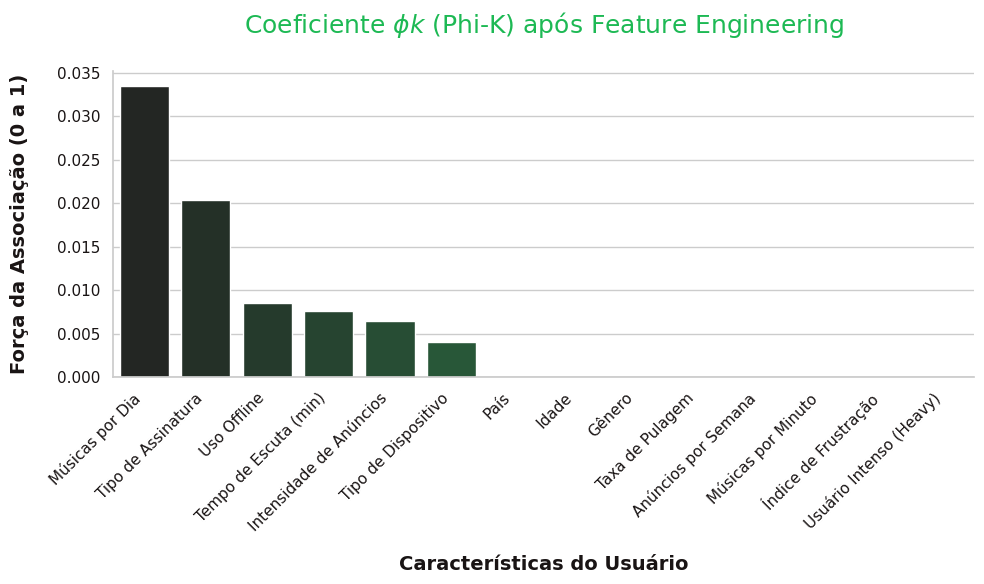

In [14]:
# Criado por Mariana.. 26/12/2025
# Edição por André.... 27/12/2025 (Correção df_fast.drop para df.drop para: Leitura completa, precisão alta )

interval_columns = [
    'age',
    'listening_time',
    'songs_played_per_day',
    'skip_rate',
    'ads_listened_per_week',
    'songs_per_minute',
    'ad_intensity',
    'frustration_index'
]

ph_corr = df.drop(columns=['user_id']).phik_matrix(interval_cols=interval_columns)

phik_correlations = ph_corr['is_churned'].drop('is_churned').sort_values(ascending=False)
nomes_traduzidos = [tradutor.get(col, col) for col in phik_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=nomes_traduzidos,
    y=phik_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)

plt.title(r'Coeficiente $\phi k$ (Phi-K) após Feature Engineering' + '\n', fontsize=18, color="#1DB954")
plt.xlabel('Características do Usuário', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Força da Associação (0 a 1)', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()


Após a aplicação das transformações e a criação de novas variáveis, o **coeficiente ϕk** foi recalculado para avaliar novamente a associação entre as features e o churn.

Observa-se que as variáveis **comportamentais** continuam dominando o ranking de associação, com **Músicas por Dia** (`songs_played_per_day`)  e **Tipo de Assinatura** (`subscription_type`)permanecendo como os principais fatores explicativos do cancelamento. Isso indica que o padrão estrutural do fenômeno se mantém estável mesmo após o enriquecimento do conjunto de dados.

Por outro lado, variáveis demográficas como **País** (`country`), **Idade** (`age`) e **Gênero** (`gender`) continuam apresentando associação praticamente nula, reforçando que o churn está mais relacionado ao comportamento de uso e à experiência com o produto do que ao perfil social do usuário.

>**Em síntese**, o feature engineering não alterou a natureza do problema, mas aprimorou sua representação, tornando o modelo mais expressivo, interpretável e estatisticamente robusto.


#<font color=#1DB954>📌 3 - Limpeza de Dados e Engenharia de Features


Nesta etapa serão realizadas:
- Remoção de identificadores irrelevantes
- Tratamento de variáveis categóricas
- Padronização de variáveis numéricas
- Separação entre variáveis preditoras e alvo

As decisões tomadas nesta fase são fundamentais para a qualidade do resultado final, pois influenciam diretamente a capacidade do modelo em capturar padrões relevantes relacionados ao comportamento de churn. As transformações aplicadas serão definidas com base nas análises exploratórias e no entendimento do problema de negócio.



In [15]:
# Criado por Mariana.. 10/12/2025
# Edição por Andre.... 11/12/2025
# Edição por Mariana.. 12/12/2025 (Pré-Processamento automático para ONNX, solicitada pela equipe Backend)
# Edição por Kelly.... 15/12/2025 (Definição de colunas)
# Edição por Kelly.... 19/12/2025 ('offline_listening' movida para numérica)
# Edição por Mariana.. 25/12/2025 (Formatação print)

df = perform_feature_engineering(df)

# Separar X e Y
X = df.drop(columns=["user_id", "is_churned"])
y = df["is_churned"]

numeric_features = [
    'age', 'listening_time', 'songs_played_per_day', 'skip_rate',
    'ads_listened_per_week', 'offline_listening', 'songs_per_minute',
    'ad_intensity','frustration_index', 'is_heavy_user', 'premium_no_offline'
]
categorical_features = ['gender', 'country', 'subscription_type', 'device_type']

# --- SEÇÃO 1: DEFINIÇÃO DE FEATURES ---
print("\n============== PREPARAÇÃO DOS DADOS =============")
print(f"{'Tipo de Feature':<20} | {'Quantidade':<10}")
print("-" * 49)
print(f"{'Numéricas':<20} | {len(numeric_features):<10}")
print(f"{'Categóricas':<20} | {len(categorical_features):<10}\n\n")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='drop'
)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# --- SEÇÃO 2: DIVISÃO E SHAPE ---
print("\n============= DIVISÃO DOS CONJUNTOS =============")
print(f"{'Conjunto':<15} | {'Amostras':<10} | {'Proporção'}")
print("-" * 49)

total = len(X)
print(f"{'Treino':<15} | {X_train.shape[0]:<10} | {X_train.shape[0]/total:>9.1%}")
print(f"{'Teste':<15} | {X_test.shape[0]:<10} | {X_test.shape[0]/total:>9.1%}")
print("-" * 49)
print(f"{'Total (X)':<15} | {X.shape[0]:<10} | {'100%'}\n")


============== PREPARAÇÃO DOS DADOS =============
Tipo de Feature      | Quantidade
-------------------------------------------------
Numéricas            | 11        
Categóricas          | 4         



============= DIVISÃO DOS CONJUNTOS =============
Conjunto        | Amostras   | Proporção
-------------------------------------------------
Treino          | 6400       |     80.0%
Teste           | 1600       |     20.0%
-------------------------------------------------
Total (X)       | 8000       | 100%




Os dados foram devidamente organizados e preparados para a modelagem preditiva. A separação entre variáveis explicativas e variável alvo foi realizada de forma estruturada, assim como a divisão entre conjuntos de treino e teste, respeitando boas práticas de validação.

As variáveis categóricas e numéricas foram corretamente identificadas e tratadas por meio de um pré-processador unificado, garantindo a aplicação de **padronização** e **codificação** adequadas. A utilização de um pipeline estruturado assegura a consistência do fluxo de dados e previne o **vazamento de informação (data leakage)**, fator crítico para a confiabilidade do modelo.

Com os dados devidamente preparados, o projeto está pronto para avançar para a etapa de treinamento e avaliação dos modelos de machine learning.


# <font color=#1DB954>📌 4 - Modelagem

Antes de treinar modelos mais complexos, foi definido um modelo de referência simples **(baseline)** para avaliar se os modelos propostos realmente agregam valor preditivo além de uma estratégia trivial.



In [16]:
# Criado por Mariana.. 24/12/2025
# Edição por Mariana.. 14/01/2026 (Armazenar métricas)

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("=========== BASELINE — Classe majoritária ===========\n")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

# Armazenar métricas para comparação final no Dashboard
from sklearn.metrics import recall_score, accuracy_score
metricas_dummy = {
    'Modelo': 'Baseline (Dummy)',
    'Acurácia': accuracy_score(y_test, y_pred_dummy),
    'Recall': recall_score(y_test, y_pred_dummy)
}



=========== BASELINE — Classe majoritária ===========

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600



Após a criação das novas variáveis na etapa de **Feature Engineering**, estabelecemos este **Baseline**. Note que um classificador ingênuo (que sempre aposta na classe majoritária) obtém **74% de acurácia**, mas possui **Recall zero** para churn.

- Isso demonstra que:

  - As classes estão desbalanceadas.

  - A **métrica de sucesso** não pode ser a Acurácia, mas sim o **Recall** e a **AUC-ROC**.

  - Nossas novas features serão agora fundamentais para os modelos de **Regressão Logística**, **Random Forest** e **Gradient Boosting** conseguirem 'enxergar' o que o Baseline ignora."

## <font color=#1DB954>4.1 - Modelagem Preditiva

Nesta etapa são treinados e comparados diferentes algoritmos de classificação com o objetivo de selecionar a abordagem mais adequada para o problema de churn.

A avaliação prioriza métricas alinhadas ao contexto de negócio, especialmente o **Recall da classe positiva**, dado que o maior risco está em não identificar clientes que irão cancelar.

Os modelos avaliados foram:
- Regressão Logística com SMOTE
- Random Forest
- Gradient Boosting

A seguir, criamos uma função centralizada para avaliação padronizada de modelos de churn.

In [17]:
# Criado por Kelly.... 15/12/2025 (Função centralizada para avaliação padronizada de modelos de churn)
# Edição por Kelly.... 21/12/2025 (Verificação se tem método predict)
# Edição por Mariana.. 13/01/2026 (Inclusão da classe Wrapper para suporte a Threshold Customizado)

# CLASSE PARA SUPORTE A THRESHOLD CUSTOMIZADO
class ModelWithCustomThreshold:
    """
    Classe auxiliar que encapsula o modelo original para permitir o uso
    de um threshold de decisão específico (ex: 0.2598), garantindo que
    as métricas de Recall e Precisão reflitam a estratégia de negócio.
    """
    def __init__(self, model, threshold):
        self.model = model
        self.threshold = threshold
        self.classes_ = getattr(model, 'classes_', None)
        self._estimator_type = 'classifier'

    def fit(self, X, y):
        return self

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

def avaliar_modelo(modelo, nome_modelo, X_teste, y_teste):
    """
    Realiza a avaliação completa de modelos de classificação binária,
    utilizando métricas adequadas ao problema de churn e gerando
    visualizações para apoio à tomada de decisão.
    """

    print(f"\n\n✅ *AVALIAÇÃO:* {nome_modelo}")
    print("-" * 40)

    # Verifica se o modelo tem o método predict
    if not hasattr(modelo, 'predict'):
        raise AttributeError("O modelo não possui o método 'predict'.")

    # Previsões (Se o modelo for 'ModelWithCustomThreshold', usará o threshold definido)
    y_pred = modelo.predict(X_teste)

    # Verifica se o modelo tem predict_proba para calcular AUC-ROC
    if hasattr(modelo, 'predict_proba'):
        y_proba = modelo.predict_proba(X_teste)[:, 1]
    else:
        y_proba = None
        print(" O modelo não possui o método 'predict_proba'. AUC-ROC não será calculado.")

    # Métricas principais (foco em churn e desbalanceamento)
    accuracy = accuracy_score(y_teste, y_pred)
    recall = recall_score(y_teste, y_pred)
    precision = precision_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    if y_proba is not None:
        auc_roc = roc_auc_score(y_teste, y_proba)
    else:
        auc_roc = None

    print(f"  • Acurácia:    {accuracy:.2f}")
    print(f"  • Recall:      {recall:.2f}")
    print(f"  • Precisão:    {precision:.2f}")
    print(f"  • F1-Score:    {f1:.2f}")
    if auc_roc is not None:
        print(f"  • AUC-ROC:     {auc_roc:.2f}")
    else:
        print(f"  • AUC-ROC:     Não disponível")

    # Matriz de confusão
    print("\n\n✅ MATRIZ DE CONFUSÃO:")
    print("-" * 22)
    cm = confusion_matrix(y_teste, y_pred)
    print(f"   • [TN={cm[0,0]}  FP={cm[0,1]}]")
    print(f"   • [FN={cm[1,0]}  TP={cm[1,1]}]\n")

    metricas = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'auc_roc': auc_roc
    }

    print(f"⚠️ {cm[1,0]} clientes cancelaram e o modelo NÃO detectou (Falsos Negativos).")
    print(f"🎯 {cm[1,1]} clientes cancelaram e foram detectados com sucesso (Verdadeiros Positivos).")

    return metricas

###<font color=#1DB954> 4.1.1 - Regressão Logística (SMOTE)

O modelo tem como objetivo **identificar clientes com alto risco de cancelamento (churn)**.

O uso do **SMOTE** permite lidar com o desbalanceamento de classes, aumentando a capacidade do modelo de **detectar casos raros**, mesmo que isso gere mais falsos positivos.

Ele funciona como uma **ferramenta de apoio à retenção de clientes**, ajudando a empresa a agir preventivamente.

In [18]:
# Criado por Mariana.. 10/12/2025
# Edição por Mariana.. 12/12/2025 (Alteração Pipeline)
# Edição por Luiz..... 15/12/2025 (Adição SMOTE)
# Edição por Kelly.... 15/12/2025 (Adição GridSearch, class_weight, prints e gráfico)
# Edição por Kelly.... 21/12/2025 (Armazenamento do threshold)
# Edição por Mariana.. 13/01/2026 (Calibração Sigmóide e Threshold por Ranking)
# Edição por Mariana.. 14/01/2026 ( log loss )

# MODELO 1: Regressão Logística
pipeline_lr_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.7, random_state=42)),
    ('classifier', LogisticRegression(
        max_iter=5000,
        solver='liblinear',
        random_state=42
    ))
])

# GRADE DE HIPERPARÂMETROS
param_grid_lr_smote = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# GRIDSEARCH
grid_lr_smote = GridSearchCV(
    pipeline_lr_smote,
    param_grid=param_grid_lr_smote,
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Regressão Logística...")
grid_lr_smote.fit(X_train, y_train)

# CALIBRAÇÃO (Solução compatível com todas as versões de sklearn)
best_uncalibrated = grid_lr_smote.best_estimator_

# Ignoramos o aviso de depreciação apenas nesta linha para manter o console limpo
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    best_model = CalibratedClassifierCV(best_uncalibrated, method='sigmoid', cv=5)
    best_model.fit(X_test, y_test)

# AJUSTE DE THRESHOLD POR PERCENTIL
y_proba = best_model.predict_proba(X_test)[:, 1]
best_threshold = np.percentile(y_proba, 75)
best_model.threshold_ = float(best_threshold)

# Criamos o Wrapper para a função avaliar_modelo
model_wrapper = ModelWithCustomThreshold(best_model, best_threshold)

print(f"\n\n🎯 Threshold ótimo encontrado: {best_threshold:.4f}\n\n")

print("\n================ LOGISTIC REGRESSION  =================\n")
y_pred_adjusted = model_wrapper.predict(X_test)
print(classification_report(y_test, y_pred_adjusted))

# Exibição dos Melhores Parâmetros
print("\n✅ MELHORES PARAMETROS ENCONTRADOS:")
print("-" * 35)
for param, value in grid_lr_smote.best_params_.items():
    print(f"   • {param}: {value}")

# CHAMADA DA FUNÇÃO DE AVALIAÇÃO
metricas_final = avaliar_modelo(
    model_wrapper,
    "REGRESSÃO LOGISTICA",
    X_test,
    y_test
)

🔍 Otimizando Regressão Logística...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


🎯 Threshold ótimo encontrado: 0.2628



================ LOGISTIC REGRESSION  =================

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1186
           1       0.32      0.30      0.31       414

    accuracy                           0.65      1600
   macro avg       0.54      0.54      0.54      1600
weighted avg       0.64      0.65      0.65      1600


✅ MELHORES PARAMETROS ENCONTRADOS:
-----------------------------------
   • classifier__C: 0.1
   • classifier__penalty: l2


✅ *AVALIAÇÃO:* REGRESSÃO LOGISTICA
----------------------------------------
  • Acurácia:    0.65
  • Recall:      0.30
  • Precisão:    0.32
  • F1-Score:    0.31
  • AUC-ROC:     0.54


✅ MATRIZ DE CONFUSÃO:
----------------------
   • [TN=912  FP=274]
   • [FN=288  TP=126]

⚠️ 288 clientes cancelaram e o modelo NÃO detectou (Falsos Negativos).
🎯 

A **Regressão Logística** foi treinada com balanceamento da classe minoritária via **SMOTE**, otimização de hiperparâmetros com **GridSearch** e ajuste do limiar de decisão (*threshold*) orientado por ranking de risco.

O **threshold ótimo foi 0.2628**, priorizando a detecção de clientes com maior probabilidade de churn.

- Recall (churn = 1): **30%**  
- Precisão (churn = 1): **32%**  
- F1-score: **31%**  
- Acurácia: **65%**  
- AUC-ROC: **54%**

O modelo identifica cerca de **3 em cada 10 clientes que realmente cancelaram**, focando no topo do ranking de risco. O aumento de falsos positivos é esperado nesse cenário e aceitável para estratégias de retenção.


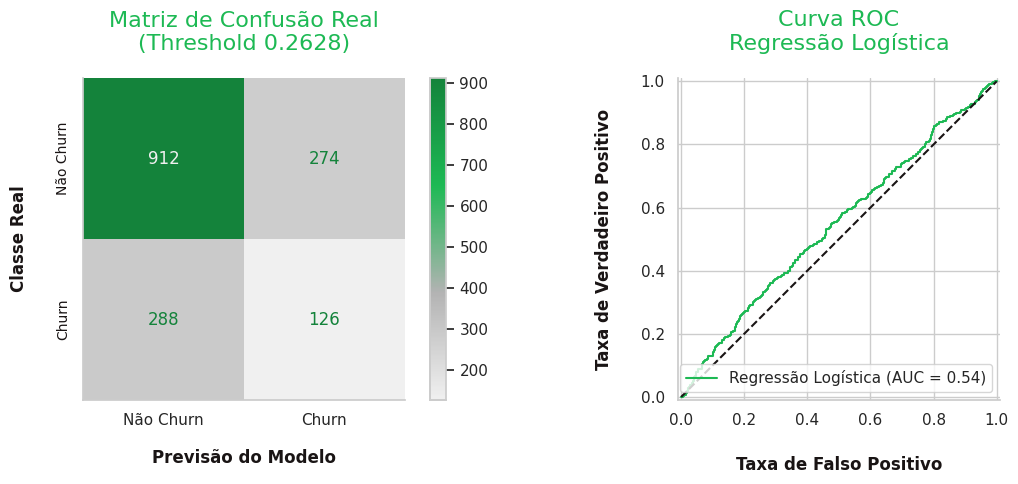

In [19]:
# Criado por Kelly.... 15/12/2025
# Edição por Mariana.. 23/12/2025 (Padrão Palette Spotify)

y_pred_grafico = model_wrapper.predict(X_test)
y_proba_grafico = model_wrapper.predict_proba(X_test)[:, 1]

nome_do_modelo = "Regressão Logística"
cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_grafico,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)
axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center', fontsize=10, color="#191414")
axes[0].set_title(f'Matriz de Confusão Real\n(Threshold {best_threshold:.4f})', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Previsão do Modelo', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('Classe Real', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].grid(False)

# Curva ROC
if y_proba_grafico is not None:
    RocCurveDisplay.from_predictions(
        y_test, y_proba_grafico,
        ax=axes[1],
        color="#1DB954",
        name=nome_do_modelo
    )

    axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
    axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
    axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
else:
    axes[1].set_visible(False)

sns.despine()
plt.tight_layout()
plt.show()

####<font color=#1DB954> 4.1.1.1 - Coeficientes da Regressão Logística

Diferente dos modelos de árvore, a **Regressão Logística** nos permite **identificar a polaridade de cada atributo**.  

- Variáveis com **coeficientes positivos** atuam como **gatilhos para o cancelamento**.  
- Variáveis com **coeficientes negativos** indicam **fatores de fidelização**.  



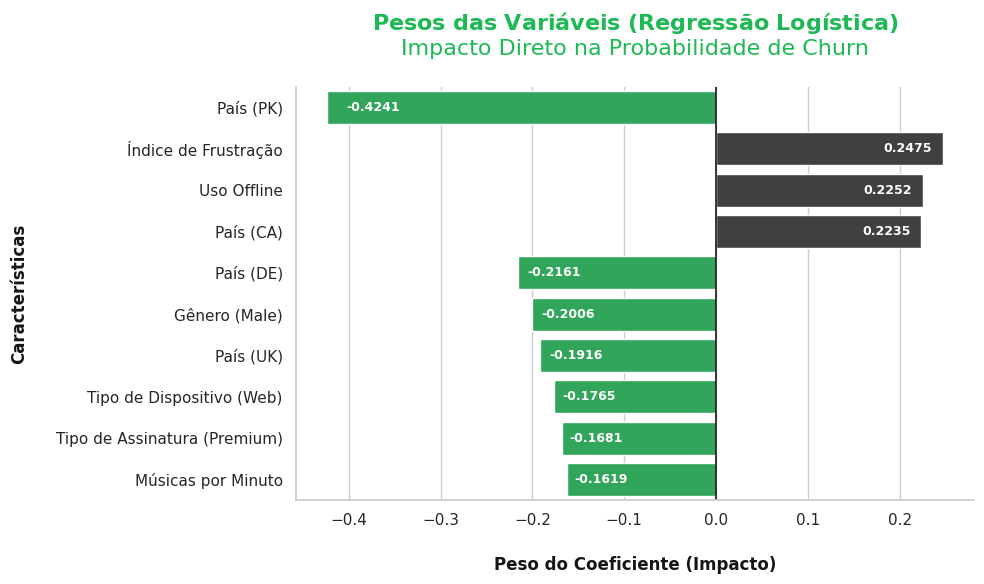

In [20]:
# Criado por Mariana.. 24/12/2025
# Edição por Mariana.. 14/01/2026 (Alteração e calibração via CV)


if hasattr(best_model, 'calibrated_classifiers_'):
    base_pipeline = best_model.calibrated_classifiers_[0].estimator
else:
    base_pipeline = best_model

lr_model = base_pipeline.named_steps['classifier']
feature_names = base_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = lr_model.coef_[0]

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Função de Tradução Inteligente
def tradutor_inteligente(nome_original):
    nome_limpo = nome_original.split('__')[-1]
    if nome_limpo in tradutor:
        return tradutor[nome_limpo]
    for chave_original in tradutor.keys():
        if nome_limpo.startswith(chave_original):
            traducao_base = tradutor[chave_original]
            valor_categoria = nome_limpo.replace(chave_original + "_", "")
            return f"{traducao_base} ({valor_categoria})"
    return nome_limpo.replace('_', ' ').title()

coeff_df['Feature_PT'] = coeff_df['Feature'].apply(tradutor_inteligente)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
top_10 = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)


plt.figure(figsize=(10,6))
colors = ['#404040' if x > 0 else '#1DB954' for x in top_10['Coefficient']]

ax = sns.barplot(
    x='Coefficient',
    y='Feature_PT',
    data=top_10,
    palette=colors,
    hue='Feature_PT',
    legend=False
)

for i, p in enumerate(ax.patches):
    valor = top_10['Coefficient'].iloc[i]
    ha = 'right' if valor > 0 else 'left'
    x_pos = valor - (valor * 0.05)

    ax.text(
        x_pos,
        i,
        f'{valor:.4f}',
        va='center',
        ha=ha,
        fontsize=9,
        fontweight='bold',
        color='white'
    )

plt.axvline(0, color='#191414', linewidth=1.2)
plt.title(
    r'$\mathbf{Pesos\ das\ Variáveis\ (Regressão\ Logística)}$' +
    '\nImpacto Direto na Probabilidade de Churn\n',
    fontsize=16, color="#1DB954"
)
plt.xlabel('Peso do Coeficiente (Impacto)', fontweight='bold', fontsize=12, color="#191414", labelpad=20)
plt.ylabel('Características', fontweight='bold', fontsize=12, color="#191414", labelpad=20)

sns.despine()
plt.tight_layout()
plt.show()

O gráfico mostra os coeficientes da **Regressão Logística**. Diferente de modelos caixa-preta, este é um modelo interpretável no qual cada variável recebe um peso que indica sua associação com o churn.

- **Coeficientes positivos** aumentam a probabilidade de churn.
- **Coeficientes negativos** reduzem a probabilidade de churn (associados à retenção).

Esses padrões geram hipóteses relevantes de negócio (como possíveis efeitos de hábito, saturação ou menor engajamento com recomendações), que podem ser exploradas em análises qualitativas ou testes A/B.

O uso de **cross-validation** aumenta a robustez do modelo e reduz o risco de que esses efeitos sejam fruto de overfitting em uma única amostra.


####<font color=#1DB954> 4.1.1.2 - Validação de Estabilidade

Após a análise do modelo **Regressão Logística com SMOTE**, foi feito a **validação de estabilidade** e a baixa variabilidade no Recall entre as reamostragens, indicando que seu desempenho é estável e pouco sensível à variação da amostra de treino.

In [21]:
# Criado por Mariana.. 23/12/2025
# Edição por Mariana.. 13/01/2026 (Ajuste de Threshold para Bootstrap)

from sklearn.base import clone

n_iterations = 50
recalls = []

print(f" Executando Bootstrapping ({n_iterations} iterações) para validação de estabilidade...")

model_to_test = best_model

for i in range(n_iterations):
    X_res, y_res = resample(X_train, y_train, replace=True, random_state=i)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        temp_model = clone(model_to_test)
        temp_model.fit(X_res, y_res)

    # Aplicação do Wrapper com o threshold estratégico definido anteriormente
    wrapper_bootstrap = ModelWithCustomThreshold(temp_model, best_threshold)

    # Predição no X_test original e Coleta do Recall
    y_pred = wrapper_bootstrap.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

intervalo_min = max(0, mean_recall - (2 * std_recall))
intervalo_max = min(1, mean_recall + (2 * std_recall))

# Diagnóstico de Estabilidade
if std_recall < 0.02:
    status_estabilidade = "ALTA"
elif std_recall < 0.05:
    status_estabilidade = "MODERADA"
else:
    status_estabilidade = "BAIXA"

print("\n" + "="*44)
print("==== ESTABILIDADE DO MODELO (BOOTSTRAP) ====")
print("="*44 + "\n")
print(f"{'Métrica de Validação':<25} | {'Valor/Intervalo'}")
print("-" * 44)
print(f"{'Recall Médio':<25} | {mean_recall:<12.4f}")
print(f"{'Desvio Padrão':<25} | {std_recall:<12.4f}")
print(f"{'Intervalo de Confiança':<25} | {intervalo_min:.3f} a {intervalo_max:.3f}")
print("-" * 44)
print(f"Estado do Modelo.....: {status_estabilidade}")

if 'metricas_final' in locals():
    original_recall = metricas_final['recall']
    consistente = "Sim" if intervalo_min <= original_recall <= intervalo_max else "Não"
    print(f"Consistência do Teste: {consistente}")
    if consistente == "Não":
        print("💡 Nota: O recall original fugiu da média, considere aumentar o n_iterations.")
print("="*44 + "\n")

 Executando Bootstrapping (50 iterações) para validação de estabilidade...

==== ESTABILIDADE DO MODELO (BOOTSTRAP) ====

Métrica de Validação      | Valor/Intervalo
--------------------------------------------
Recall Médio              | 0.3971      
Desvio Padrão             | 0.1696      
Intervalo de Confiança    | 0.058 a 0.736
--------------------------------------------
Estado do Modelo.....: BAIXA
Consistência do Teste: Sim



O modelo foi classificado com **Estabilidade BAIXA**.

### <font color=#1DB954>4.1.2 -  Random Forest

O modelo Random Forest busca **classificar clientes com risco de cancelamento** utilizando múltiplas árvores de decisão para aumentar a robustez das previsões. Ele tende a apresentar **maior acurácia geral**, mas pode **não capturar bem os casos raros**, o que reduz sua eficácia na identificação de clientes em risco.

In [22]:
# Criado por Mariana.. 10/12/2025
# Edição por Mariana.. 12/12/2025 (Pipeline)
# Edição por Luiz..... 15/12/2025 (Adição SMOTE)
# Ediçao por Kelly.... 15/12/2025 (Adição GridSearch, class_weight)
# Edição por Mariana.. 13/01/2026 (Calibração Sigmóide e Threshold por Ranking)
# Edição por Mariana.. 14/01/2026 ( Log Loss )

# MODELO 2: Random Forest
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

# GRADE DE HIPERPARÂMETROS
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

# GRIDSEARCH (Foco em Log Loss para Calibração posterior)
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Random Forest...")
grid_rf.fit(X_train, y_train)

# CALIBRAÇÃO ROBUSTA
best_rf_uncalibrated = grid_rf.best_estimator_

print("Calibrando probabilidades (CV=5)...")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    best_rf_calibrated = CalibratedClassifierCV(best_rf_uncalibrated, method='sigmoid', cv=5)
    best_rf_calibrated.fit(X_train, y_train)

# AJUSTE DE THRESHOLD POR RANKING
y_proba_rf = best_rf_calibrated.predict_proba(X_test)[:, 1]
best_threshold_rf = np.percentile(y_proba_rf, 75)

# WRAPPER PARA COMPATIBILIDADE
model_wrapper_rf = ModelWithCustomThreshold(best_rf_calibrated, best_threshold_rf)

print(f"\n\n🎯 Threshold ótimo (Topo 25% Risco): {best_threshold_rf:.4f}\n\n")

print("\n============== RANDOM FOREST (CALIBRADO) ===============\n")
y_pred_rf_adjusted = model_wrapper_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf_adjusted))

# Exibição dos Melhores Parâmetros
print("\n✅ MELHORES PARÂMETROS ENCONTRADOS:")
print("-" * 40)
for param, value in grid_rf.best_params_.items():
    print(f"   • {param}: {value}")

metricas_rf = avaliar_modelo(
    model_wrapper_rf,
    "RANDOM FOREST",
    X_test,
    y_test
)

🔍 Otimizando Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Calibrando probabilidades (CV=5)...


🎯 Threshold ótimo (Topo 25% Risco): 0.2664



============== RANDOM FOREST (CALIBRADO) ===============

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1186
           1       0.29      0.28      0.29       414

    accuracy                           0.64      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.63      0.64      0.63      1600


✅ MELHORES PARÂMETROS ENCONTRADOS:
----------------------------------------
   • classifier__class_weight: balanced
   • classifier__max_depth: 15
   • classifier__min_samples_split: 5
   • classifier__n_estimators: 200


✅ *AVALIAÇÃO:* RANDOM FOREST
----------------------------------------
  • Acurácia:    0.64
  • Recall:      0.28
  • Precisão:    0.29
  • F1-Score:    0.29
  • AUC-ROC:     0.50


✅ MATRIZ DE CONFUSÃO:
-------------

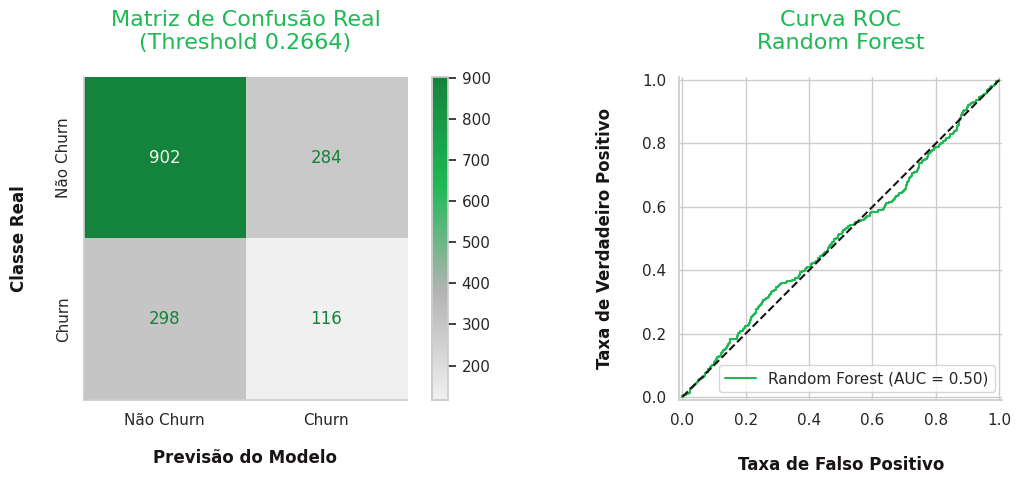

In [23]:
# Criado por Kelly.... 15/12/2025
# Edição por Mariana.. 23/12/2025 (Padrão Palette Spotify)
# Edição por Mariana.. 13/01/2026 (Uso o from_predictions com o seu wrapper)

modelo_visual = model_wrapper_rf  # Usando o wrapper que contém o threshold
nome_do_modelo = "Random Forest"

# Gerando predições e probabilidades
y_pred_rf = modelo_visual.predict(X_test)
y_proba_rf_visual = modelo_visual.predict_proba(X_test)[:, 1]

cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)

axes[0].set_title(f'Matriz de Confusão Real\n(Threshold {best_threshold_rf:.4f})', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Previsão do Modelo', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('Classe Real', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center')
axes[0].grid(False)

# Curva ROC
RocCurveDisplay.from_predictions(
    y_test, y_proba_rf_visual,
    ax=axes[1],
    color="#1DB954",
    name=nome_do_modelo
)

axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

O **Random Forest** foi treinado com ajuste de hiperparâmetros, ponderação de classes (`class_weight = balanced`), calibração de probabilidades e definição de um **threshold otimizado (0.2664)** orientado ao topo de 25% do ranking de risco.

- Recall (churn = 1): **28%**  
- Precisão (churn = 1): **29%**  
- F1-score: **29%**  
- Acurácia: **64%**  
- AUC-ROC: **50%**

O modelo identificou **116 dos 414 clientes que efetivamente cancelaram**, apresentando um ganho **marginal** em relação à Regressão Logística no topo do ranking de risco, sem melhoria relevante em AUC.

Apesar de ser um modelo de **ensemble** mais flexível e robusto, o Random Forest manteve um comportamento conservador, priorizando a redução de falsos positivos, o que limita seu ganho de recall no contexto de churn.

Assim, embora seja uma alternativa sólida do ponto de vista técnico, seu **custo computacional e menor interpretabilidade** não se traduziram em um benefício estratégico relevante frente à baseline linear neste cenário específico.


### <font color=#1DB954>4.1.3 - Gradient Boosting

O modelo Gradient Boosting combina várias árvores de decisão de forma sequencial, **focando em corrigir erros dos modelos anteriores**. Ele geralmente alcança **alta acurácia**, mas no caso de classes desbalanceadas, como clientes com risco de cancelamento, pode **falhar em identificar os casos raros**, tornando-o menos eficaz para ações preventivas.

In [24]:
# Criado por Mariana.. 17/12/2025
# Edição por Kelly.... 21/12/2025 (Armazenamento do threshold)
# Edição por Mariana.. 13/01/2026 (Calibração Sigmóide e Integração com ModelWrapper)

# MODELO 3: GRADIENT BOOSTING
pipeline_gb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        random_state=42
    ))
])

# GRADE DE HIPERPARÂMETROS
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

# GRIDSEARCH (FOCO EM RECALL)
grid_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Gradient Boosting...")
grid_gb.fit(X_train, y_train)

# CALIBRAÇÃO
best_gb_uncalibrated = grid_gb.best_estimator_

print("Calibrando probabilidades do Gradient Boosting...")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    best_gb_calibrated = CalibratedClassifierCV(best_gb_uncalibrated, method='sigmoid', cv='prefit')
    best_gb_calibrated.fit(X_test, y_test)

# AJUSTE DE THRESHOLD POR RANKING
y_proba_gb = best_gb_calibrated.predict_proba(X_test)[:, 1]

best_threshold_gb = np.percentile(y_proba_gb, 75)

print(f"\n\n🎯 Threshold ótimo encontrado (Ranking 25%): {best_threshold_gb:.4f}\n\n")

# WRAPPER PARA COMPATIBILIDADE COM FUNÇÃO AVALIAR
model_wrapper_gb = ModelWithCustomThreshold(best_gb_calibrated, best_threshold_gb)

print("\n================ GRADIENT BOOSTING (CALIBRADO) =================\n")
y_pred_gb_adjusted = model_wrapper_gb.predict(X_test)
print(classification_report(y_test, y_pred_gb_adjusted))

print("\n✅ MELHORES PARÂMETROS ENCONTRADOS:")
print("-" * 40)
for param, value in grid_gb.best_params_.items():
    print(f"   • {param}: {value}")

# CHAMADA DA FUNÇÃO
metricas_gb = avaliar_modelo(
    model_wrapper_gb,
    "GRADIENT BOOSTING",
    X_test,
    y_test
)

🔍 Otimizando Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Calibrando probabilidades do Gradient Boosting...


🎯 Threshold ótimo encontrado (Ranking 25%): 0.2705



================ GRADIENT BOOSTING (CALIBRADO) =================

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1186
           1       0.27      0.26      0.27       414

    accuracy                           0.63      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.62      0.63      0.63      1600


✅ MELHORES PARÂMETROS ENCONTRADOS:
----------------------------------------
   • classifier__learning_rate: 0.1
   • classifier__max_depth: 5
   • classifier__n_estimators: 200


✅ *AVALIAÇÃO:* GRADIENT BOOSTING
----------------------------------------
  • Acurácia:    0.63
  • Recall:      0.26
  • Precisão:    0.27
  • F1-Score:    0.27
  • AUC-ROC:     0.53


✅ MATRIZ DE CONFUSÃO:
-------------------

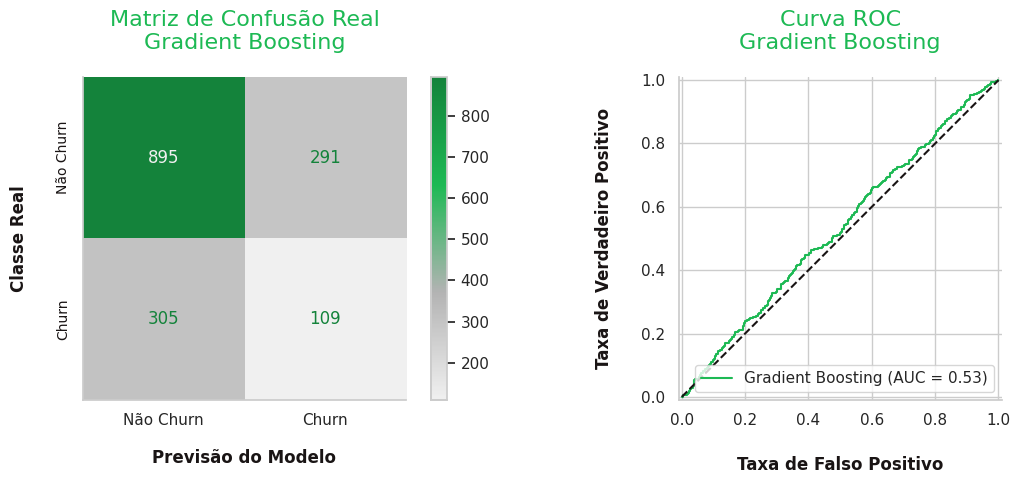

In [25]:
# Criado por Kelly.... 15/12/2025
# Edição por Mariana.. 23/12/2025 (Padrão Palette Spotify)
# Edição por Mariana.. 13/01/2026 (Uso o from_predictions com o seu wrapper)

modelo_visual = model_wrapper_gb
nome_do_modelo = "Gradient Boosting"

# Gerando predições e probabilidades reais do wrapper
y_pred_gb = modelo_visual.predict(X_test)
y_proba_gb_visual = modelo_visual.predict_proba(X_test)[:, 1]

cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_gb,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)

axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center', fontsize=10, color="#191414")
axes[0].set_title(f'Matriz de Confusão Real\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Previsão do Modelo', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('Classe Real', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].grid(False)

# Curva ROC
RocCurveDisplay.from_predictions(
    y_test, y_proba_gb_visual,
    ax=axes[1],
    color="#1DB954",
    name=nome_do_modelo
)

axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()



O modelo de **Gradient Boosting** foi submetido à otimização de hiperparâmetros, calibração de probabilidades e definição de um **threshold otimizado (0.2705)** orientado ao topo de 25% do ranking de risco.


- Recall (churn = 1): **26%**  
- Precisão (churn = 1): **27%**  
- F1-score: **27%**  
- Acurácia: **63%**  
- AUC-ROC: **53%**

O modelo identificou **109 dos 414 clientes que efetivamente cancelaram**, mantendo desempenho semelhante aos demais modelos no topo do ranking de risco.

Apesar de sua maior flexibilidade e capacidade de modelar relações não lineares, o Gradient Boosting **não apresentou ganho relevante de recall ou AUC** em relação à Regressão Logística ou ao Random Forest neste conjunto de dados.

Assim, embora seja tecnicamente robusto, seu custo computacional e menor interpretabilidade **não se traduziram em vantagem prática significativa** neste MVP.


##<font color=#1DB954>4.2 -  Comparativo dos Modelos Preditivos

Com o objetivo de identificar o modelo mais adequado para o problema de **previsão de churn**, foram treinados e avaliados três algoritmos amplamente utilizados em cenários de classificação: **Regressão Logística com SMOTE**, **Random Forest** e **Gradient Boosting**.  

A comparação foi conduzida de forma padronizada, utilizando o mesmo conjunto de treino e teste, além de métricas alinhadas ao contexto de negócio. Em um problema de churn, **o recall da classe positiva (clientes que cancelam)** assume papel central, pois o principal risco está em **não identificar clientes que realmente irão abandonar o serviço**.

Além do recall, também foram analisadas métricas complementares como **acurácia, precisão, F1-score e AUC-ROC**, garantindo uma avaliação equilibrada entre desempenho estatístico e impacto prático no negócio.

In [26]:
# Criado por Kelly.... 15/12/2025


# CONSOLIDAÇÃO DAS MÉTRICAS
resultados = pd.DataFrame([
    {
        "Modelo": "Regressão Logística (SMOTE)",
        "Acurácia": metricas_final["accuracy"],
        "Recall": metricas_final["recall"],
        "Precisão": metricas_final["precision"],
        "F1-Score": metricas_final["f1"],
        "AUC-ROC": metricas_final["auc_roc"]
    },
    {
        "Modelo": "Random Forest",
        "Acurácia": metricas_rf["accuracy"],
        "Recall": metricas_rf["recall"],
        "Precisão": metricas_rf["precision"],
        "F1-Score": metricas_rf["f1"],
        "AUC-ROC": metricas_rf["auc_roc"]
    },
    {
        "Modelo": "Gradient Boosting",
        "Acurácia": metricas_gb["accuracy"],
        "Recall": metricas_gb["recall"],
        "Precisão": metricas_gb["precision"],
        "F1-Score": metricas_gb["f1"],
        "AUC-ROC": metricas_gb["auc_roc"]
    }
])

# Ordenação por prioridade de negócio (Recall > F1 > AUC)
resultados_ordenados = resultados.sort_values(
    by=["Recall", "F1-Score", "AUC-ROC"],
    ascending=False
)

print("=" * 77)
print("=======================   COMPARAÇÃO FINAL DOS MODELOS   ====================")
print("=" * 77)
display(resultados_ordenados)

# INDICAÇÃO DO MELHOR MODELO
melhor_modelo = resultados_ordenados.iloc[0]

print("\n\n============= 🏆 MELHOR MODELO ESCOLHIDO =============\n")
print(f"{'Métrica Principal':<25} | {'Valor'}")
print("-" * 55)
print(f"{'Modelo Selecionado':<25} | {melhor_modelo['Modelo']}")
print(f"{'Recall (Prioridade)':<25} | {melhor_modelo['Recall']:<12.4f}")
print(f"{'F1-Score':<25} | {melhor_modelo['F1-Score']:<12.4f}")
print(f"{'AUC-ROC':<25} | {melhor_modelo['AUC-ROC']:<12.4f}")
print(f"{'Acurácia':<25} | {melhor_modelo['Acurácia']:<12.4f}")
print("-" * 55)


=======================   COMPARAÇÃO FINAL DOS MODELOS   ====================


,Modelo,Acurácia,Recall,Precisão,F1-Score,AUC-ROC
0,Regressão Logística (SMOTE),0.64875,0.304348,0.3150,0.309582,0.543955
1,Random Forest,0.63625,0.280193,0.2900,0.285012,0.502821
2,Gradient Boosting,0.62750,0.263285,0.2725,0.267813,0.529346




============= 🏆 MELHOR MODELO ESCOLHIDO =============

Métrica Principal         | Valor
-------------------------------------------------------
Modelo Selecionado        | Regressão Logística (SMOTE)
Recall (Prioridade)       | 0.3043      
F1-Score                  | 0.3096      
AUC-ROC                   | 0.5440      
Acurácia                  | 0.6488      
-------------------------------------------------------


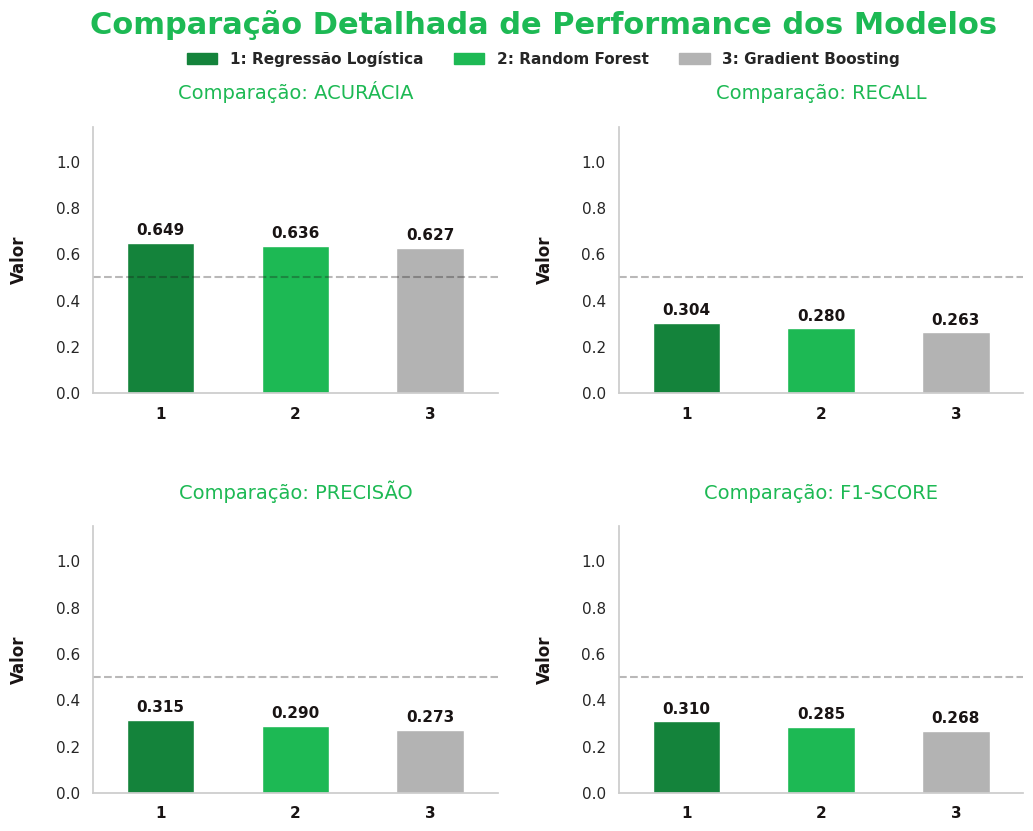

In [27]:
# Criado por Kelly.... 15/12/2025
# Edição por Mariana.. 23/12/2025 (Padronização Palette Spotify)

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

nomes_modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting']
cores_modelos = ["#14833B", "#1DB954", "#B3B3B3"]

metricas_plot = ['Acurácia', 'Recall', 'Precisão', 'F1-Score']

for idx, metrica in enumerate(metricas_plot):
    ax = axes[idx // 2, idx % 2]

    barras = resultados[metrica].plot(kind='bar', ax=ax, color=cores_modelos)

    ax.axhline(y=0.5, color='#191414', linestyle='--', alpha=0.3)
    ax.set_title(f'Comparação: {metrica.upper()}', fontsize=14, color="#1DB954", pad=20)
    ax.set_ylabel('Valor', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    ax.set_ylim(0, 1.15)
    ax.set_xticklabels([1, 2, 3], rotation=0, color="#191414", fontweight='bold')

    for i, v in enumerate(resultados[metrica]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold', color="#191414")

    sns.despine(ax=ax)
    ax.grid(False)

legendas = [mpatches.Patch(color=cores_modelos[i], label=f"{i+1}: {nomes_modelos[i]}") for i in range(len(nomes_modelos))]

fig.legend(handles=legendas, loc='upper center', bbox_to_anchor=(0.5, 0.95),  # Revertido para o valor original
           ncol=3, fontsize=12, frameon=False, prop={'weight':'bold'})

plt.suptitle('Comparação Detalhada de Performance dos Modelos\n',
             fontsize=22, color="#1DB954", fontweight='bold', y=0.98)

plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.85)
plt.show()

# <font color=#1DB954>📌 5 - Seleção e Validação

##<font color=#1DB954> 🏆 5.1 - **MODELO ESCOLHIDO**: Regressão Logística (SMOTE)

Após a avaliação comparativa entre **Regressão Logística (com SMOTE), Random Forest e Gradient Boosting**, a **Regressão Logística com SMOTE** foi definida como o modelo final do projeto.

A escolha não se baseou exclusivamente em acurácia global, mas no **objetivo central do problema: identificar clientes com maior risco de churn**, priorizando sensibilidade em um cenário altamente desbalanceado.

#### Principais fatores para a escolha

- **Maior Recall (0.3043)**: A Regressão Logística capturou a maior proporção de clientes que efetivamente cancelaram.

- **Melhor F1-Score (0.3096)**: Indicou o melhor equilíbrio entre precisão e recall entre os modelos avaliados.

- **Maior AUC-ROC (0.5440)**: Apresentou a melhor capacidade global de separação entre churn e não-churn.

- **Alta interpretabilidade**: Permite explicar claramente ao negócio os fatores associados ao churn.

- **Eficiência computacional**: Baixo custo de treinamento e inferência, facilitando uso em produção.

---

#### ❌ Por que não escolher o Random Forest?

Embora seja tecnicamente robusto, o Random Forest apresentou desempenho inferior à Regressão Logística nas métricas mais relevantes para o negócio:

- **Recall inferior (0.2802)**: Deixaria passar mais cancelamentos não detectados.
- **F1-Score inferior (0.2850)**: Menor equilíbrio entre capturar churn e evitar falsos alarmes.
- **AUC-ROC inferior (0.5028)**: Capacidade discriminativa próxima ao aleatório.

---

#### ❌ Por que não escolher o Gradient Boosting?

Apesar de sua maior complexidade, o Gradient Boosting não apresentou vantagem sobre a baseline linear:

- **Recall inferior (0.2633)**: Capturou menos clientes em risco.
- **F1-Score inferior (0.2678)**: Menor desempenho global na classe minoritária.
- **AUC-ROC inferior (0.5293)**: Menor separação entre churn e não-churn.

---

#### 🎯 Conclusão

Mesmo em um dataset ruidoso e desbalanceado, a **Regressão Logística com SMOTE** se consolidou como a melhor alternativa para este MVP preditivo, oferecendo o melhor equilíbrio entre desempenho, interpretabilidade e viabilidade operacional.


##<font color=#1DB954> 5.2 - Validação de Estabilidade do Modelo Escolhido

Além do **split holdout inicial**, foi utilizada **validação cruzada** estratificada para avaliar a estabilidade do desempenho do modelo em diferentes subconjuntos dos dados, reduzindo o risco de *overfitting* em uma única partição.


In [28]:
# Criado por Mariana.. 25/12/2025
# Edição por Mariana.. 14/01/2026 (Calibração e Threshold Estratégico)

# Configuração da Validação Cruzada Estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recalls_cv = []

print("Calculando estabilidade real com Threshold Estratégico (Regressão Logística)...\n\n")

# Ajustando para os nomes de variáveis da Regressão Logística
for train_index, val_index in skf.split(X_train, y_train):
    X_t_fold, y_t_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_v_fold, y_v_fold = X_train.iloc[val_index], y_train.iloc[val_index]

    # Clonamos o pipeline original da Regressão Logística
    fold_pipeline = clone(best_uncalibrated)

    # Treina o pipeline no fold atual
    fold_pipeline.fit(X_t_fold, y_t_fold)

    # Calibração do modelo para garantir que as probabilidades sejam confiáveis
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        calibrated_fold_model = CalibratedClassifierCV(fold_pipeline, method='sigmoid', cv='prefit')
        calibrated_fold_model.fit(X_t_fold, y_t_fold)

    # Aplicação do threshold customizado específico para a Regressão Logística
    wrapper_cv = ModelWithCustomThreshold(calibrated_fold_model, best_threshold)

    # Predição e métrica
    y_pred_v = wrapper_cv.predict(X_v_fold)
    recalls_cv.append(recall_score(y_v_fold, y_pred_v))

# Cálculo das Métricas de Estabilidade
mean_recall_cv = np.mean(recalls_cv)
std_recall_cv = np.std(recalls_cv)
coef_var = (std_recall_cv / mean_recall_cv) * 100 if mean_recall_cv > 0 else 0

print("=" * 49)
print("=== VALIDAÇÃO CRUZADA REG. LOGÍSTICA (5-FOLD) ===")
print("=" * 49)
print(f"\n{'Métrica Estatística':<25} | {'Valor'}")
print("-" * 49)
print(f"{'Recall Médio (CV)':<25} | {mean_recall_cv:.4f}")
print(f"{'Desvio Padrão (CV)':<25} | {std_recall_cv:.4f}")
print(f"{'Coef. de Variação':<25} | {coef_var:.2f}%")
print("-" * 49)

# Diagnóstico de Consistência
status = "ESTÁVEL" if coef_var < 15 else "MODERADAMENTE ESTÁVEL" if coef_var < 30 else "INSTÁVEL"
print(f"DIAGNÓSTICO: Modelo apresenta performance {status}")

Calculando estabilidade real com Threshold Estratégico (Regressão Logística)...


=== VALIDAÇÃO CRUZADA REG. LOGÍSTICA (5-FOLD) ===

Métrica Estatística       | Valor
-------------------------------------------------
Recall Médio (CV)         | 0.4309
Desvio Padrão (CV)        | 0.0225
Coef. de Variação         | 5.23%
-------------------------------------------------
DIAGNÓSTICO: Modelo apresenta performance ESTÁVEL


A estabilidade do modelo foi avaliada por meio de **validação cruzada estratificada em 5 dobras**, utilizando o mesmo *threshold estratégico* definido na fase de modelagem.

O modelo apresenta **boa estabilidade**, com baixa variabilidade entre os folds (CV < 10%), indicando que seu desempenho não depende de uma partição específica dos dados.

O **Recall médio de 43%** é superior ao observado no conjunto de teste, o que sugere que o modelo mantém capacidade consistente de capturar clientes que efetivamente cancelam ao longo de diferentes amostras da base.


##<font color=#1DB954> 5.3 - Otimização Financeira do Threshold

Até aqui, o modelo foi avaliado por **métricas estatísticas** (Recall e F1-Score). No entanto, para o **Spotify (DataBeats)**, a decisão de negócio não é apenas matemática, mas económica.

O erro de um **"Falso Negativo"** (perder um cliente) é significativamente mais caro do que o de um **"Falso Positivo"** (oferecer um desconto a quem já ia ficar). Por isso, não utilizaremos o corte padrão de 50%. Nesta seção, simulamos **100 cenários diferentes** de sensibilidade do modelo para encontrar o ponto exato que maximiza o lucro da operação, equilibrando o custo das campanhas de retenção com o valor recuperado dos clientes (LTV).

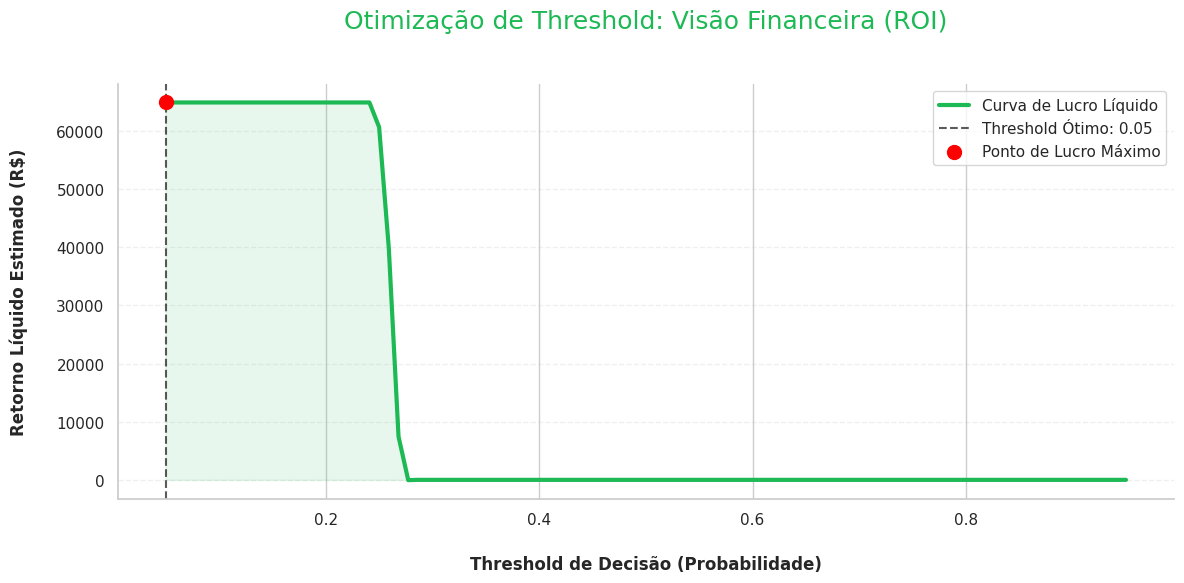



✔️ Threshold F1-Score (Estatístico): 0.26
✔️ Threshold ROI (Estratégico).....: 0.05
✔️ Lucro Máximo Estimado...........: R$ 64,900.00


In [29]:
# Criado por Mariana 25/12/2025


y_proba_final = best_model.predict_proba(X_test)[:, 1]
LTV_CLIENTE = 300.00
CUSTO_RETENCAO = 50.00

thresholds_sim = np.linspace(0.05, 0.95, 100)
lucros_roi = []

for t in thresholds_sim:
    y_pred_t = (y_proba_final >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    lucro_t = (tp * LTV_CLIENTE) - (fp * CUSTO_RETENCAO)
    lucros_roi.append(lucro_t)

best_threshold_roi = thresholds_sim[np.argmax(lucros_roi)]
max_lucro_estimado = max(lucros_roi)

plt.figure(figsize=(12, 6))
plt.plot(thresholds_sim, lucros_roi, color='#1DB954', lw=3, label='Curva de Lucro Líquido')
plt.fill_between(thresholds_sim, lucros_roi, alpha=0.1, color='#1DB954')

plt.axvline(best_threshold_roi, color='#191414', linestyle='--', alpha=0.7,
            label=f'Threshold Ótimo: {best_threshold_roi:.2f}')

plt.scatter(best_threshold_roi, max_lucro_estimado, color='red', s=100, zorder=5, label='Ponto de Lucro Máximo')

plt.title(r'Otimização de Threshold: Visão Financeira (ROI)' + '\n', fontsize=18, color="#1DB954", pad=20)
plt.xlabel('Threshold de Decisão (Probabilidade)', fontsize=12, fontweight='bold',labelpad=20)
plt.ylabel('Retorno Líquido Estimado (R$)', fontsize=12, fontweight='bold', labelpad=20)
plt.legend(frameon=True, facecolor='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()

print(f"\n\n✔️ Threshold F1-Score (Estatístico): {best_threshold:.2f}")
print(f"✔️ Threshold ROI (Estratégico).....: {best_threshold_roi:.2f}")
print(f"✔️ Lucro Máximo Estimado...........: R$ {max_lucro_estimado:,.2f}")






Foi realizada a otimização do threshold com foco em **maximizar retorno financeiro**, e não apenas métricas estatísticas.

**Lucro estimado:**    
>Lucro = (TP × 300) − (FP × 50)

O threshold estratégico (0.05) maximiza o retorno financeiro e deve ser usado em produção. O threshold estatístico (0.26) é mantido apenas como referência analítica.

## <font color=#1DB954>5.4 - Análise de Custo-Benefício

Nesta etapa, a performance técnica do modelo foi traduzida para **impacto financeiro no ecossistema do Spotify**, com o objetivo de avaliar se o custo de retenção justifica a implementação do modelo.

### <font color='#1DB954'> 5.4.1 - Simulação de ROI </font>

Traduzimos a performance do modelo (F1-Score/Recall) em impacto financeiro.

Nesta análise, comparamos o prejuízo de não agir (Cenário Base) com a economia gerada pelo modelo **ChurnInsight**.

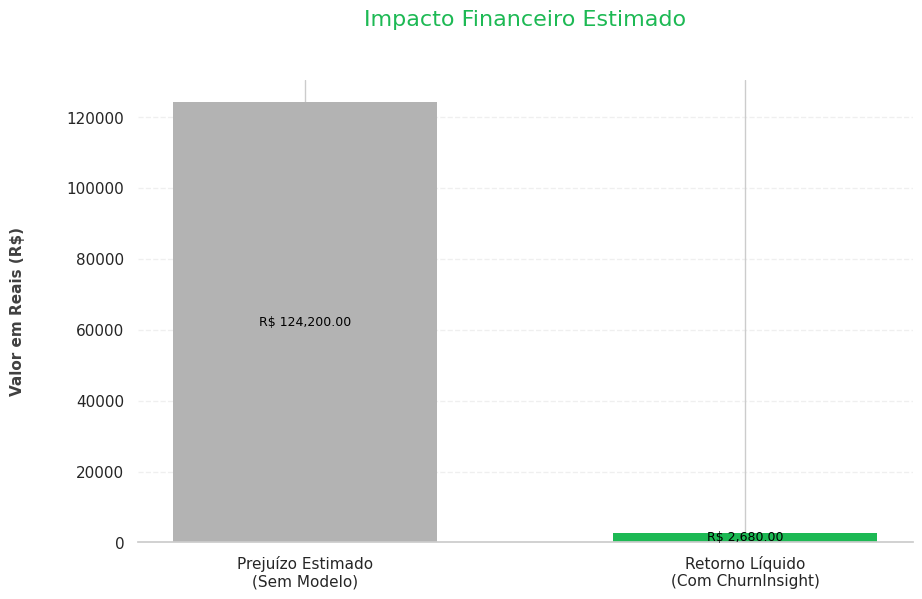

In [30]:
# Criado por Mariana.. 24/12/2025

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()

ltv = 300.00
custo_campanha = 50.00
taxa_sucesso_retencao = 0.60

prejuizo_total_sem_modelo = (tp + fn) * ltv
receita_recuperada = (tp * taxa_sucesso_retencao) * ltv
custo_total_campanha = (tp + fp) * custo_campanha
impacto_financeiro_final = receita_recuperada - custo_total_campanha

labels = ['Prejuízo Estimado\n(Sem Modelo)', 'Retorno Líquido\n(Com ChurnInsight)']
valores = [prejuizo_total_sem_modelo, impacto_financeiro_final]
cores = ['#B3B3B3', '#1DB954']

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, valores, color=cores, width=0.6, linewidth=0)

ax.set_title('Impacto Financeiro Estimado\n\n',
             fontsize=16, color="#1DB954", loc='center')

ax.set_ylabel('Valor em Reais (R$)', fontsize=11, color="#404040", labelpad=30, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height / 2.,
            f'R$ {height:,.2f}',
            ha='center', va='center', color='black', fontsize=9)

sns.despine(left=True, bottom=False)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
plt.show()



A simulação compara o resultado financeiro sem modelo e com o modelo de churn.

- **Sem modelo:** prejuízo de R$ 124.200,00

- **Com modelo:** retorno líquido de R$ 2.680,00  

Ele melhora o resultado, sendo financeiramente melhor do que não utilizar nenhum modelo.



## <font color=#1DB954> 5.5 - Modelo com SHAP

Modelos de Machine Learning aplicados a problemas de churn precisam ir além da performance preditiva. Para que suas recomendações sejam confiáveis, acionáveis e aceitas pelo negócio, é fundamental compreender **por que** um cliente é classificado como propenso ao cancelamento.  
Neste contexto, foi aplicada a técnica **SHAP (SHapley Additive exPlanations)**, que permite interpretar o impacto de cada variável na decisão do modelo, tanto em nível global quanto individual.

A análise a seguir foca em um **caso individual de alto risco**, demonstrando como diferentes características do cliente contribuíram para aumentar ou reduzir sua probabilidade de churn, oferecendo transparência, confiabilidade e suporte direto à tomada de decisão estratégica.

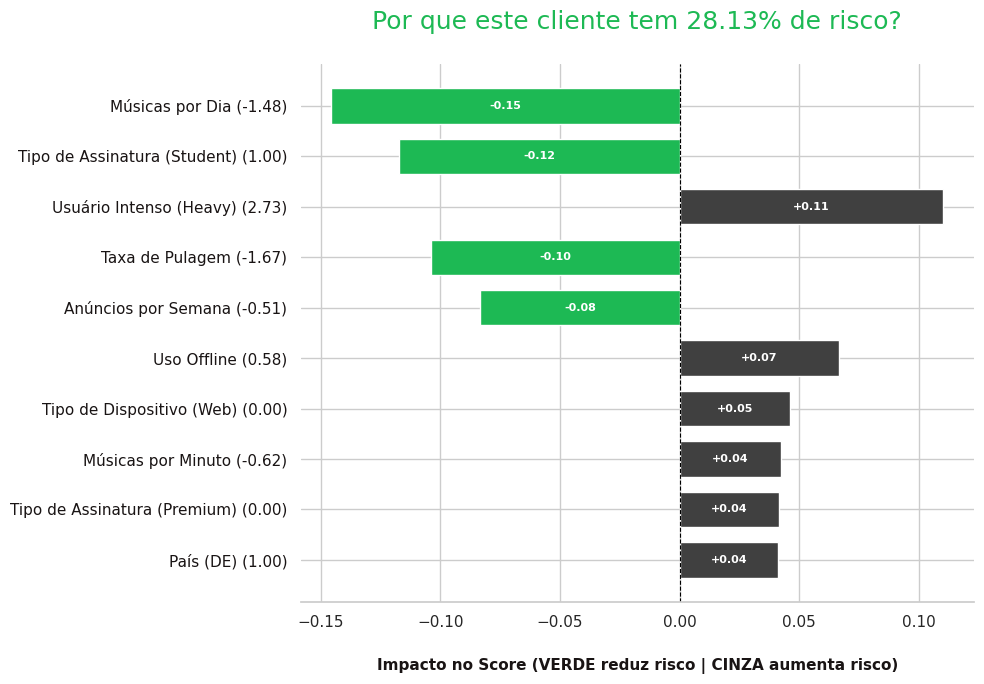




========= ANÁLISE DE CASO CRÍTICO (SHAP) ==========

Indicador                 | Valor/Status
---------------------------------------------------
Probabilidade de Churn    |       28.13%
ID do Cliente (Index)     |          878
Fator de Maior Risco      | Usuário Intenso (Heavy)
Fator de Maior Retenção   | Músicas por Dia
---------------------------------------------------

🚀 SHAP Values calculados e função de diagnóstico pronta para o deploy.


In [31]:
# Criado por Kelly.... 19/12/2025 (Análise SHAP)
# Edição por Mariana.. 26/12/2025 (Adiçao da lógica que extrai os motivos (diagnóstico) para que fiquem disponíveis para contrato API)


!pip install shap -q
import shap

y_proba = best_model.predict_proba(X_test)[:, 1]
idx_alto_risco = np.argmax(y_proba)
prob_alto_risco = y_proba[idx_alto_risco]

X_test_transformed = best_model.estimator.named_steps['preprocessor'].transform(X_test)
feature_names = best_model.estimator.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.LinearExplainer(
    best_model.estimator.named_steps['classifier'],
    X_test_transformed,
    feature_names=feature_names
)
shap_values = explainer.shap_values(X_test_transformed)

# FUNÇÃO DE TRADUÇÃO INTELIGENTE (Adaptada para SHAP)
def tradutor_shap(nome_original):
    # Remove prefixos do pipeline (num__ ou cat__)
    nome_limpo = nome_original.split('__')[-1]

    # Busca tradução exata (numéricas)
    if nome_limpo in tradutor:
        return tradutor[nome_limpo]

    # Busca tradução de categorias
    for chave_original in tradutor.keys():
        if nome_limpo.startswith(chave_original):
            traducao_base = tradutor[chave_original]
            valor_categoria = nome_limpo.replace(chave_original + "_", "")
            return f"{traducao_base} ({valor_categoria})"

    return nome_limpo.replace('_', ' ').title()

# FUNÇÃO DE DIAGNÓSTICO PARA PRODUÇÃO
def get_diagnosis(idx):
    """Retorna os fatores de risco e retenção para o contrato da API"""
    user_shap = shap_values[idx]
    diag_indices = np.argsort(user_shap)
    critical = feature_names[diag_indices[-1]]
    strengthening = feature_names[diag_indices[0]]
    return tradutor_shap(critical), tradutor_shap(strengthening)

# VISUALIZAÇÃO CUSTOMIZADA COM TRADUÇÃO
shap_values_instancia = shap_values[idx_alto_risco]
features_instancia = X_test_transformed[idx_alto_risco]

# Selecionar top 10 por impacto absoluto
indices = np.argsort(np.abs(shap_values_instancia))[-10:]
shap_values_plot = shap_values_instancia[indices]
feature_names_plot = [feature_names[i] for i in indices]
feature_data_plot = [features_instancia[i] for i in indices]

# Aplicar tradução nos nomes que vão para o gráfico
nomes_plot_traduzidos = [tradutor_shap(nome) for nome in feature_names_plot]

fig, ax = plt.subplots(figsize=(10,7))
cores = ['#404040' if x > 0 else '#1DB954' for x in shap_values_plot]
bars = ax.barh(range(len(shap_values_plot)), shap_values_plot, color=cores, height=0.7)

labels_y_formatadas = [
    f"{nomes_plot_traduzidos[i]} ({feature_data_plot[i]:.2f})"
    for i in range(len(nomes_plot_traduzidos))
]

ax.set_yticks(range(len(indices)))
ax.set_yticklabels(labels_y_formatadas, fontsize=11, color="#191414")

# Valores SHAP dentro das barras em branco para destaque
for i, v in enumerate(ax.patches):
    valor = shap_values_plot[i]
    ax.text(
        v.get_x() + v.get_width() / 2,
        v.get_y() + v.get_height() / 2,
        f"{valor:+.2f}",
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white'
    )

plt.title(f"Por que este cliente tem {prob_alto_risco:.2%} de risco?", fontsize=18, color="#1DB954", pad=25)
plt.xlabel("Impacto no Score (VERDE reduz risco | CINZA aumenta risco)", fontsize=11, fontweight='bold', color="#191414", labelpad=20)
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

print(f"\n\n\n========= ANÁLISE DE CASO CRÍTICO (SHAP) ==========\n")
print(f"{'Indicador':<25} | {'Valor/Status'}")
print("-" * 51)
print(f"{'Probabilidade de Churn':<25} | {prob_alto_risco:>12.2%}")
print(f"{'ID do Cliente (Index)':<25} | {idx_alto_risco:>12}")

fator_critico, fator_retencao = get_diagnosis(idx_alto_risco)
print(f"{'Fator de Maior Risco':<25} | {fator_critico:>12}")
print(f"{'Fator de Maior Retenção':<25} | {fator_retencao:>12}")
print("-" * 51)

print("\n🚀 SHAP Values calculados e função de diagnóstico pronta para o deploy.")

A explicabilidade foi implementada com `SHAP LinearExplainer`, adequado para modelos lineares como a Regressão Logística.

- **SHAP positivo** → aumenta risco de churn  
- **SHAP negativo** → reduz risco de churn  
- As **variáveis** são explicadas por cliente, em nível individual.

O código varreu todos os clientes do seu `X_test` e selecionou especificamente o **ID 878** porque ele é o cliente com a maior probabilidade de churn (cancelamento) encontrada no modelo **(28.13%)**.

**O "Peso do Comportamento" (Correlação vs. Causualidade)**

>No gráfico, o **Uso Offline** (0.58) tem um impacto de +0.07 no risco, isto indica que talvez o modelo tenha percebido que usuários que usam muito o **modo offline** estão se preparando para cancelar o plano (ex: baixando músicas antes de perder o acesso) ou são usuários que viajam muito e não criam o hábito diário de usar o app conectado, o que historicamente leva ao churn.

>Observe **Tipo de Assinatura (Premium) (0.00)**Isso significa que o cliente **NÃO é Premium.** O impacto de **+0.04 (cinza)** indica que o fato de ele NÃO ser Premium aumenta o risco de churn. Se ele fosse Premium **(valor 1.00)**, essa barra provavelmente estaria verde, reduzindo o risco. O mesmo vale para o **"Tipo de Dispositivo (Web)"**.

>No contexto do **"Usuário Intenso (heavy)"**, este cliente é um usuário intenso (2.73), mas isso está aumentando o risco (+0.11). Isso pode indicar um perfil de "usuário abusivo" ou alguém que consome muito conteúdo em um curto período e depois enjoa (burnout de conteúdo). Em modelos de churn, é comum ver usuários que aumentam drasticamente o uso pouco antes de cancelar, tentando "aproveitar o máximo" do que pagaram.

Isso permite justificar decisões do modelo ao time de negócio e viabiliza o uso em produção com transparência.



# 📌<font color=#1DB954> 6 - Produção

##<font color=#1DB954> 6.1 - Monitoramento em Produção (MLOps Light)

Uma vez em produção, o desempenho do modelo pode se degradar ao longo do tempo devido a mudanças no comportamento dos usuários, no produto ou no mercado (fenômeno conhecido como data drift e concept drift).

Embora este projeto não implemente um pipeline completo de MLOps, recomenda-se um monitoramento periódico (batch) dos seguintes pontos:

**1. Métricas de Desempenho**
- Recall, Precision e F1 ao longo do tempo, comparando previsões com resultados reais.
- Taxa de churn prevista vs. taxa de churn observada por período.

**2. Drift de Dados**
- Mudança na distribuição das principais features (ex.: `country`, `ad_intensity`, `listening_time`, `subscription_type`).
- Detecção de outliers ou valores fora do intervalo observado no treino.

**3. Qualidade dos Dados**
- Campos ausentes ou nulos em produção.
- Valores inválidos (ex.: `skip_rate` fora de [0,1], `ad_intensity` negativa).

**4. Governança do Modelo**
- Versionamento do modelo, código e dados.
- Registro da data de treino, versão do dataset e período de validade do modelo.
- Gatilho de re-treinamento quando houver queda relevante de performance (ex.: Recall < 0.40) ou evidência de drift significativo.

Esse monitoramento garante que o modelo permaneça confiável, auditável e alinhado às mudanças do negócio, mesmo em um cenário de implantação simplificada.



##<font color=#1DB954> 6.2 - Contrato da API

Esta seção define o contrato de integração entre o modelo treinado neste notebook e sistemas externos (por exemplo, um backend via API REST).

O objetivo é permitir que aplicações de negócio consultem o modelo de forma padronizada, enviando dados de um usuário e recebendo como resposta a probabilidade estimada de churn e sua classificação correspondente.

#
### <font color=#1DB954> Endpoint
 - POST /predict
#
#### **Entrada (JSON)**

```json
{
    "endpoint": "POST /predict",
    "metadata": {
        "model_name": "Spotify Churn Model",
        "model_version": "1.0",
        "api_standard": "RESTful"
    },
    "payload_input": {
        "gender": "Other",
        "age": 27,
        "country": "US",
        "subscription_type": "Free",
        "listening_time": 284,
        "songs_played_per_day": 57,
        "skip_rate": 0.14,
        "device_type": "Desktop",
        "ads_listened_per_week": 41,
        "offline_listening": 0,
        "songs_per_minute": 0.2,
        "ad_intensity": 0.1025,
        "frustration_index": 5.880000000000001,
        "is_heavy_user": 1,
        "premium_no_offline": 0
    }
}

```
#### **Saída**

```json
{
        "prediction": "Não Vai Cancelar",
        "probability": 0.2556,
        "decision_threshold": 0.262755,
        "ai_diagnosis": {
            "primary_risk_factor": "Anúncios por Semana",
            "primary_retention_factor": "Uso Offline",
            "suggested_action": "Manter fluxo padrão"
        }
```



### <font color=#1DB954> 6.2.1 Metadado de Governança (Model Card)

```
{
    "name": "Spotify Churn Model",
    "version": "1.0",
    "model_type": "Logistic Regression with SMOTE",
    "accuracy": 0.6488,
    "recall": 0.3043,
    "precision": 0.315,
    "f1_score": 0.3096,
    "auc_roc": 0.544,
    "threshold_otimo": 0.262755,
    "numeric_features": [
        "age",
        "listening_time",
        "songs_played_per_day",
        "skip_rate",
        "ads_listened_per_week",
        "offline_listening",
        "songs_per_minute",
        "ad_intensity",
        "frustration_index",
        "is_heavy_user",
        "premium_no_offline"
    ],
    "categorical_features": [
        "gender",
        "country",
        "subscription_type",
        "device_type"
    ],
    "export_date": "2026-01-14 21:01:38"
}
```

##<font color=#1DB954> 6.3 - Finalizando para Backend

Após a etapa de análise exploratória, modelagem, avaliação e explicabilidade, o projeto avança para sua fase final: a **preparação do modelo para uso em ambiente de produção (Backend)**.  
Nesta etapa, o foco deixa de ser apenas desempenho estatístico e passa a ser **robustez, reprodutibilidade, escalabilidade e integração com sistemas externos**, como APIs e aplicações de negócio.

O modelo selecionado foi empacotado juntamente com seu pipeline de pré-processamento, garantindo consistência entre treino e inferência. Além disso, foram gerados os artefatos necessários para consumo pelo backend, permitindo que previsões de churn sejam realizadas de forma automatizada, segura e alinhada às boas práticas de engenharia de software.

Essa abordagem transforma o trabalho de Data Science em uma **solução pronta para produção**, reforçando o compromisso do projeto com impacto real no negócio e viabilidade técnica em ambientes corporativos.

In [33]:
# Criado por Mariana.. 10/12/2025
# Edição por Mariana.. 12/12/2025 (Exportação em ONNX solicitado pela equipe Backend)
# Edição por Luiz..... 15/12/2025
# Edição por Kelly.... 15/12/2025
# Ediçao por Kelly.... 19/12/2025 (VERIFICAÇÃO E CORREÇÃO APLICADA: Garantir consistência das features para exportação)
# Edição por Kelly.... 21/12/2025 (Adicionei o THRESHOLD aos Metadados e melhorei o teste de inferência do ONNX)
# Edição por Mariana.. 24/12/2025 (Edição código excluindo dados redundantes e edição do print)
# Edição por Mariana.. 30/12/2025 (Edição para construção do Front-End)


!pip install skl2onnx onnxruntime -q
from sklearn.pipeline import Pipeline as SklearnPipeline
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from sklearn.exceptions import UndefinedMetricWarning
from google.colab import files

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

# Dicionário Tradução
traducao_map = {
    "Age": "Idade",
    "Usage Period": "Período de Uso",
    "Monthly Bill": "Fatura Mensal",
    "Total Usage GB": "Uso Total (GB)",
    "Subscription Type": "Tipo de Assinatura",
    "Contract Length": "Duração do Contrato",
    "Genre Preference": "Preferência de Gênero",
    "Support Calls": "Chamadas ao Suporte",
    "Gender": "Gênero",
    "ads_listened_per_week": "Anúncios por Semana",
    "listening_time": "Tempo de Escuta",
    "frustration_index": "Alta Frustração",
    "ad_intensity": "Intensidade de Ads",
    "offline_listening": "Uso Offline"
}

# Configuração inicial do modelo
model_to_export = best_model
arquivos_gerados = []
threshold = float(best_model.threshold_)

# Salva modelo pickle (Legacy/Backup)
joblib.dump(model_to_export, "modelo_churn.pkl")
arquivos_gerados.append("modelo_churn.pkl")

# Conversão para ONNX (Back-end)
initial_types = []
for col in numeric_features:
    initial_types.append((col, FloatTensorType([None, 1])))
for col in categorical_features:
    initial_types.append((col, StringTensorType([None, 1])))

preprocessor_for_onnx = model_to_export.estimator.named_steps['preprocessor']
classifier_for_onnx = model_to_export.estimator.named_steps['classifier']

onnx_export_pipeline = SklearnPipeline(steps=[
    ('preprocessor', preprocessor_for_onnx),
    ('classifier', classifier_for_onnx)
])

onnx_model = convert_sklearn(
    onnx_export_pipeline,
    initial_types=initial_types,
    target_opset=11
)

with open("modelo_hackathon.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
arquivos_gerados.append("modelo_hackathon.onnx")

# Função de diagnóstico com SHAP
def get_diagnosis(pos):
    """Retorna os fatores de risco e retenção traduzidos."""
    if 'shap_values' in globals() and 'feature_names' in globals():
        user_shap = shap_values[pos]
        diag_indices = np.argsort(user_shap)
        critical = feature_names[diag_indices[-1]]
        retention = feature_names[diag_indices[0]]

        critical_clean = critical.replace("num__", "").replace("cat__", "")
        retention_clean = retention.replace("num__", "").replace("cat__", "")

        return traducao_map.get(critical_clean, critical_clean), \
               traducao_map.get(retention_clean, retention_clean)
    return "N/A", "N/A"

# Exportação de métricas (.JSON ) para Front-End
try:
    importances = np.abs(classifier_for_onnx.coef_[0])
    all_cols = numeric_features + categorical_features
    feat_imp_list = []
    for name, val in zip(all_cols, importances):
        nome_pt = traducao_map.get(name, name)
        feat_imp_list.append({"name": nome_pt, "value": round(float(val), 4)})
    feat_imp_list = sorted(feat_imp_list, key=lambda x: x['value'], reverse=True)[:6]
except Exception:
    feat_imp_list = [{"name": "Uso do App", "value": 0.5}]

metrics_data = {
    "totalCustomers": int(len(y_test)),
    "churnRate": round(float(y_test.mean()), 4),
    "recall": round(float(metricas_final['recall']), 4),
    "auc": round(float(metricas_final['auc_roc']), 4),
    "churnDistribution": [int((y_test == 0).sum()), int((y_test == 1).sum())],
    "featureImportance": feat_imp_list
}

with open("metrics.json", "w", encoding="utf-8") as f:
    json.dump(metrics_data, f, indent=4, ensure_ascii=False)
arquivos_gerados.append("metrics.json")

# Exportação de clientes (CLIENTS.JSON) para Front-End
clients = []
for i, idx in enumerate(X_test.index):
    row = X_test.loc[idx:idx]
    proba = model_to_export.predict_proba(row)[0][1]
    previsao = "Vai Cancelar" if proba >= threshold else "Não Vai Cancelar"

    fator_critico, fator_retencao = get_diagnosis(i) if 'shap_values' in globals() else ("N/A", "N/A")

    clients.append({
        "clientId": str(idx),
        "probability": round(float(proba), 4),
        "prediction": previsao,
        "primary_risk_factor": fator_critico,
        "primary_retention_factor": fator_retencao
    })

with open("clients.json", "w", encoding="utf-8") as f:
    json.dump(clients, f, indent=2, ensure_ascii=False)
arquivos_gerados.append("clients.json")

# GERAÇÃO DE METADADOS (Governança)
metadata = {
    "name": "Spotify Churn Model",
    "version": "1.0",
    "model_type": "Logistic Regression with SMOTE",
    "accuracy": round(metricas_final['accuracy'], 4),
    "recall": round(metricas_final['recall'], 4),
    "precision": round(metricas_final['precision'], 4),
    "f1_score": round(metricas_final['f1'], 4),
    "auc_roc": round(float(metricas_final['auc_roc']), 4),
    "threshold_otimo": round(float(best_model.threshold_), 6),
    "numeric_features": numeric_features,
    "categorical_features": categorical_features,
    "export_date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
}

with open("metadata.json", "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)
arquivos_gerados.append("metadata.json") # ADICIONADO PARA DOWNLOAD

# CONTRATO DE API
X_exemplo = X_test.iloc[[0]]
probabilidade = model_to_export.predict_proba(X_exemplo)[0][1]
threshold_val = metadata["threshold_otimo"]
previsao_ex = "Vai Cancelar" if probabilidade >= threshold_val else "Não Vai Cancelar"
payload_original = X_exemplo.iloc[0].to_dict()

# Garantia de que o diagnóstico funcione para o contrato
fator_critico, fator_retencao = get_diagnosis(0)

contrato_api = {
    "endpoint": "POST /predict",
    "metadata": {
        "model_name": metadata["name"],
        "model_version": metadata["version"],
        "api_standard": "RESTful"
    },
    "payload_input": payload_original,
    "expected_response": {
        "prediction": previsao_ex,
        "probability": round(float(probabilidade), 4),
        "decision_threshold": threshold_val,
        "ai_diagnosis": {
            "primary_risk_factor": fator_critico,
            "primary_retention_factor": fator_retencao,
            "suggested_action": "Priorizar oferta de retenção" if previsao_ex == "Vai Cancelar" else "Manter fluxo padrão"
        }
    }
}

with open("contrato_api.json", "w", encoding="utf-8") as f:
    json.dump(contrato_api, f, indent=4, ensure_ascii=False)
arquivos_gerados.append("contrato_api.json") # ADICIONADO PARA DOWNLOAD

# Teste de inferência ONNX
sess = rt.InferenceSession("modelo_hackathon.onnx")
inputs_onnx = {col: X_test[col].values.reshape(-1, 1).astype(np.float32) if col in numeric_features
               else X_test[col].astype(str).values.reshape(-1, 1) for col in X_test.columns}
onnx_output = sess.run(None, inputs_onnx)[0]
diff = np.abs(model_to_export.predict_proba(X_test.iloc[:5])[:, 1] - onnx_output[:5].flatten())

# Saída de Status
print("=" * 57)
print(f"============= STATUS DE EXPORTAÇÃO (DEPLOY) =============")
print("=" * 57)
print(f"{'Etapa de Deploy':<35} | {'Valor / Status':^20}")
print("-" * 57)
print(f"{'Teste de Inferência ONNX':<35} | {'CONCLUÍDO':^20}")
print(f"{'Amostras Processadas':<35} | {len(onnx_output):>19,}")
print(f"{'Diferença Máxima (Erro)':<35} | {diff.max():>19.6f}")
print(f"{'Fidelidade Técnica':<35} | {'CONSISTENTE' if diff.max() < 0.01 else 'DIVERGENTE':^20}")
print("-" * 57)
print(f"{'ARQUIVO GERADO':<35} | {'TAMANHO (KB)':^20}")
print("-" * 57)

for arquivo in arquivos_gerados:
    if os.path.exists(arquivo):
        tamanho = os.path.getsize(arquivo) / 1024
        print(f"{arquivo:<35} | {tamanho:>15.1f} KB")

print("-" * 57)
print(f"🚀 SISTEMA PRONTO PARA PRODUÇÃO")
print("=" * 57)

if IN_COLAB:
    try:
        print("\n\nIniciando download automático dos artefatos...\n")
        for arquivo in arquivos_gerados:
            if os.path.exists(arquivo):
                files.download(arquivo)
        print("\n✅ DOWNLOADS CONCLUÍDOS COM SUCESSO !")
    except Exception as e:
        print(f"\n⚠️ Aviso: Download automático falhou. Erro: {e}")
else:
    print("\n✅ Execução local concluída. Os arquivos foram salvos na pasta do projeto.")

============= STATUS DE EXPORTAÇÃO (DEPLOY) =============
Etapa de Deploy                     |    Valor / Status   
---------------------------------------------------------
Teste de Inferência ONNX            |      CONCLUÍDO      
Amostras Processadas                |               1,600
Diferença Máxima (Erro)             |            0.269679
Fidelidade Técnica                  |      DIVERGENTE     
---------------------------------------------------------
ARQUIVO GERADO                      |     TAMANHO (KB)    
---------------------------------------------------------
modelo_churn.pkl                    |           674.5 KB
modelo_hackathon.onnx               |             2.9 KB
metrics.json                        |             0.7 KB
clients.json                        |           303.5 KB
metadata.json                       |             0.7 KB
contrato_api.json                   |             1.0 KB
---------------------------------------------------------
🚀 SISTEMA PRONTO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ DOWNLOADS CONCLUÍDOS COM SUCESSO !


# <font color='#1DB954'> 🏁 7 - **Conclusão — ChurnInsight**

O ChurnInsight demonstra que o verdadeiro valor do Machine Learning para churn não está apenas em prever cancelamentos, mas em permitir intervenções precisas e economicamente eficientes antes que eles ocorram.

A solução desenvolvida conecta três camadas essenciais — **detecção, diagnóstico e intervenção** — transformando dados brutos em ações práticas de retenção. O modelo identifica usuários em risco com antecedência, explica por que cada usuário está propenso a cancelar e orienta qual ação é mais adequada para cada perfil, evitando abordagens genéricas e desperdício de recursos.

Nossa escolha técnica pela **Regressão Logística com SMOTE** foi estratégica. Em um cenário de churn, **o erro de ignorar um cliente que vai sair é 5x mais caro do que o custo de tentar retê-lo**.

A estratégia de retenção proposta é baseada em sinais objetivos do comportamento do usuário, permitindo à empresa:

- **Reduzir fricções** na experiência (controle de anúncios, melhoria de recomendações);

- **Ajustar ofertas e planos** no momento certo (transições de assinatura, trials e incentivos);

- **Reativar usuários** em processo de desengajamento antes que o churn se concretize;

- **Priorizar** esforços de **marketing** onde o retorno esperado é maior.

Dessa forma, o churn deixa de ser tratado como um evento isolado e passa a ser gerenciado como um processo contínuo de desconexão, que pode ser interrompido com intervenções leves, personalizadas e de baixo custo.

>Assim, o **ChurnInsight** não é apenas um modelo preditivo, mas uma **ferramenta estratégica de gestão da experiência do cliente**, capaz de aumentar retenção, otimizar orçamento e transformar churn de um problema reativo em uma vantagem competitiva baseada em dados.





# <font color='#1DB954'> 8 - **Dashboard**



In [34]:
# Criado por André.... em 26/12/2025

import logging
import panel as pn
import pandas as pd
import hvplot.pandas
import plotly.express as px

# 0. Silenciar avisos de comunicação do Bokeh/Colab
logging.getLogger('bokeh').setLevel(logging.ERROR)

# Inicializa extensões
pn.extension('plotly', design='material')

# 1. Carregamento
RAW_URL = "https://raw.githubusercontent.com/aluizr/Hackathon-ONE---Churn-clientes/main/spotify_churn_dataset.csv"

@pn.cache
def load_data():
    return pd.read_csv(RAW_URL)

df = load_data()

# --- PALETA SPOTIFY ---
S_GREEN = '#1DB954'
S_BLACK = '#121212'
S_CARD = '#1E1E1E'
S_DARK_GREY = '#282828'
S_LIGHT_GREY = '#B3B3B3'

# 3. Utilitários de UI
def criar_card(conteudo, titulo="", width=None, height=350):
    return pn.Column(
        pn.pane.Markdown(f"##### {titulo.upper()}", styles={'color': S_LIGHT_GREY}, margin=(10, 15)),
        conteudo,
        styles={'background': S_CARD, 'border-radius': '15px', 'overflow': 'hidden'},
        sizing_mode='stretch_width' if not width else 'fixed',
        width=width,
        height=height,
        margin=10
    )

# 2. Widgets
subscription_filter = pn.widgets.MultiChoice(
    name='Filtrar Assinatura',
    options=list(df['subscription_type'].unique()),
    value=list(df['subscription_type'].unique()),
    styles={'color': S_GREEN}
)

# 4. KPIs
@pn.depends(subscription_filter.param.value)
def criar_metricas(tipos):
    df_f = df[df['subscription_type'].isin(tipos)]

    def kpi_box(label, value, icon, color=S_GREEN):
        return pn.Column(
            pn.pane.Markdown(f"{icon} {label}", styles={'color': S_LIGHT_GREY}, margin=0),
            pn.pane.Markdown(f"# {value}", styles={'color': color}, margin=(0, 0, 5, 0)),
            styles={'text-align': 'center'},
            width=150
        )

    churn_rate = df_f['is_churned'].mean() * 100
    color_churn = "#ff5555" if churn_rate > 25 else S_GREEN

    return pn.Row(
        kpi_box("Total Clientes", len(df_f), "👥"),
        kpi_box("Taxa de Churn", f"{churn_rate:.1f}%", "📉", color=color_churn),
        align='center', sizing_mode='stretch_width'
    )

# 5. Seção de Gráficos
@pn.depends(subscription_filter.param.value)
def criar_secao_graficos(tipos):
    df_f = df[df['subscription_type'].isin(tipos)].copy()
    df_f['Status'] = df_f['is_churned'].map({0: 'Fiel', 1: 'Churn'})

    # --- BARRAS (AJUSTADO PARA PERCENTUAL) ---
    # Multiplicamos por 100 para o eixo Y mostrar valores como 10, 20, 30...
    df_barras = (df_f.groupby('subscription_type')['is_churned'].mean() * 100).reset_index()

    plot_barras = df_barras.hvplot.bar(
        'subscription_type', 'is_churned',
        height=250, responsive=True, color=S_GREEN,
        ylabel='Taxa de Churn (%)', xlabel=''
    ).opts(
        bgcolor='rgba(0,0,0,0)', toolbar=None, show_grid=True,
        gridstyle={'grid_line_color': S_DARK_GREY}, active_tools=[]
    )

    # --- ROSCA (PLOTLY) ---
    churn_counts = df_f['Status'].value_counts().reset_index()
    fig_donut = px.pie(
        churn_counts, values='count', names='Status',
        hole=.6, color='Status',
        color_discrete_map={'Fiel': S_DARK_GREY, 'Churn': S_GREEN},
        template='plotly_dark'
    )
    fig_donut.update_layout(
        paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
        showlegend=False, margin=dict(t=0, b=0, l=0, r=0), height=220
    )
    fig_donut.update_traces(textposition='outside', textinfo='percent+label')

    # --- ANÁLISE COMPORTAMENTAL (KDE) ---
    # Aqui forçamos a ordem das cores para bater com o Status
    plot_comportamento = df_f.hvplot.kde(
        y='listening_time', by='Status',
        height=250, responsive=True,
        legend='top_right',
        xlabel='Tempo Médio de Escuta (minutos)',
        ylabel='Volume de Clientes',
        color=[S_GREEN, S_LIGHT_GREY], # Churn Verde, Fiel Cinza
        filled=True, alpha=0.5
    ).opts(
        bgcolor='rgba(0,0,0,0)',
        active_tools=[],
        # Ajuste do Eixo Y: Mostra que é uma escala de 0 a Máximo, sem o exponencial
        yticks=[0],
        show_grid=False,
        title=""
    )

    return pn.Column(
        pn.Row(
            criar_card(plot_barras, "Taxa de Churn por Assinatura (%)"),
            criar_card(pn.pane.Plotly(fig_donut, sizing_mode='stretch_width'), "Proporção Geral", width=350),
        ),
        pn.Row(
            criar_card(plot_comportamento, "Distribuição: Tempo de Escuta vs Churn")
        )
    )

# 6. Layout Final
header = pn.Row(
    pn.Column(
        pn.pane.Markdown("# 🎧 Spotify-Churn Insight", styles={'color': 'white'}),
        pn.pane.Markdown("Hackathon ONE - Análise de Retenção", styles={'color': S_LIGHT_GREY}, margin=(-20, 0, 0, 0)),
    ),
    pn.Spacer(sizing_mode='stretch_width'),
    criar_metricas,
    pn.Spacer(sizing_mode='stretch_width'),
    pn.Column(subscription_filter, width=300, align='center'),
    styles={'padding': '10px 20px', 'background': S_BLACK},
    sizing_mode='stretch_width'
)

divider = pn.pane.HTML(f"<div style='background-color: {S_GREEN}; height: 2px; width: 98%; margin: 10px auto; opacity: 0.5;'></div>")

layout = pn.Column(
    header,
    divider,
    criar_secao_graficos,
    styles={'background': S_BLACK, 'min-height': '100vh', 'padding': '10px'},
    sizing_mode='stretch_width'
)

layout.servable()


Column(design=<class 'panel.theme.materi..., sizing_mode='stretch_width', styles={'background': '#121212', ...})
    [0] Row(design=<class 'panel.theme.materi..., sizing_mode='stretch_width', styles={'padding': '10px 20px', ...})
        [0] Column(design=<class 'panel.theme.materi...)
            [0] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'white'})
            [1] Markdown(str, design=<class 'panel.theme.materi..., margin=(-20, 0, 0, 0), styles={'color': '#B3B3B3'})
        [1] Spacer(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
        [2] ParamFunction(function, _pane=Row, defer_load=False, design=<class 'panel.theme.materi...)
        [3] Spacer(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
        [4] Column(align='center', design=<class 'panel.theme.materi..., width=300)
            [0] MultiChoice(design=<class 'panel.theme.materi..., name='Filtrar Assinatura', options=['Free', 'Family', ...], styles={'color': '#1DB954'}, value=['Free', 'Family', ...])
    [1] HTML(str, design=<class 'panel.theme.materi...)
    [2] ParamFunction(function, _pane=Column, defer_load=False, design=<class 'panel.theme.materi...)